# Projet 3 OpenFoodFacts - Notebook de nettoyage du jeu de données

Lien vers les consignes du projet sur openclassrooms : https://openclassrooms.com/fr/projects/628/assignment

description du jeu de données : https://world.openfoodfacts.org/data/data-fields.txt

# Question 1 Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

## Environnement & Imports

In [220]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [311]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

# Affichage des graphiques dans le notebook
%matplotlib inline

In [312]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
#configure Pandas pour afficher jusqu'à 200 colonnes dans les DataFrames.
pd.set_option('display.max_columns', 200)
# configure Pandas pour afficher jusqu'à 1000 lignes dans les DataFrames.
pd.set_option('display.max_rows', 1000)
#configure Pandas pour afficher la totalité de la largeur des colonnes des DataFrames, sans limite.
pd.set_option('display.max_colwidth', -1)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\3918097067.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [313]:
# Displaying number of missing values per column

def plot_export_missing(df, cols, n_file, title,
                        shorten_label=False, figsize=(12,8)):
    with plt.style.context('default'):
        fig, axs = plt.subplots(2,1)
        msno.matrix(df[cols] , sparkline=False,
                    fontsize=11, ax=axs[0])
        msno.bar(df[cols], ax=axs[1], fontsize=11)
        if shorten_label:
            for ax in axs:
                lab = [item.get_text() for item in ax.get_xticklabels()]
                short_lab = [s[:7]+'...'+s[-7:] if len(s)>14 else s for s in lab]
                ax.axes.set_xticklabels(short_lab)
    fig.set_size_inches(figsize)
    [ax.grid() for ax in axs.flatten()];
    [sns.despine(ax=ax, right=False, left=False,top=False, bottom=False)\
                                        for ax in axs.flatten()];
    plt.subplots_adjust(hspace=0.3)
    plt.tight_layout(rect=[0, 0.05, 1, 0.92])
    fig.suptitle(title, fontweight='bold', fontsize=14)
    if not os.path.exists(os.getcwd()+'/FIG'):
        os.makedirs('FIG')
    plt.savefig(os.getcwd()+'/FIG/'+n_file, dpi=400);
    plt.show()

In [314]:
# def save_figure(n_file):
#     fig_dir = os.path.join(os.getcwd(), 'FIG')
#     if not os.path.exists(fig_dir):
#         os.makedirs(fig_dir)
#     fig_path = os.path.join(fig_dir, n_file)
#     plt.savefig(fig_path, dpi=400)
#     plt.show()

In [315]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def save_figure_opt(n_file, library='matplotlib'):
    fig_dir = os.path.join(os.getcwd(), 'FIG')
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    fig_path = os.path.join(fig_dir, n_file)
    if library == 'seaborn':
        sns.savefig(fig_path, dpi=400)
    else:
        plt.savefig(fig_path, dpi=400)
    plt.show()


## Chargement Dataset

In [317]:
#data = pd.read_csv("fropenfoodfactsorgproducts.csv", sep='\t')
data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')

C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\4216209585.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')


In [318]:
#data_orig = data.copy()

In [418]:
data.head(1)

code  \
0  3087   

                                                                                          url  \
0  http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   

  last_modified_t last_modified_datetime        product_name generic_name  \
0  1474103893      2016-09-17T09:18:13Z   Farine de blé noir  NaN           

  quantity packaging packaging_tags           brands      brands_tags  \
0  1kg      NaN       NaN            Ferme t'y R'nao  ferme-t-y-r-nao   

  categories categories_tags categories_fr origins origins_tags  \
0  NaN        NaN             NaN           NaN     NaN           

  manufacturing_places manufacturing_places_tags labels labels_tags labels_fr  \
0  NaN                  NaN                       NaN    NaN         NaN        

  emb_codes emb_codes_tags first_packaging_code_geo cities cities_tags  \
0  NaN       NaN            NaN                      NaN    NaN          

  purchase_places stores countries countries_tags countries_fr  \
0  NaN             NaN    en:FR     en:france      France        

  ingredients_text allergens allergens_fr traces traces_tags traces_fr  \
0  NaN              NaN       NaN          NaN    NaN         NaN        

  serving_size  no_nutriments  additives_n additives additives_tags  \
0  NaN         NaN            NaN           NaN       NaN             

  additives_fr  ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
0  NaN         NaN                          NaN                          

  ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
0  NaN                           NaN                                        

   ingredients_that_may_be_from_palm_oil  \
0 NaN                                      

  ingredients_that_may_be_from_palm_oil_tags  nutrition_grade_uk  \
0  NaN                                       NaN                   

  nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
0  e                  NaN           NaN            

                                                                                                                                                                                                                                                                                                                                              states  \
0  en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   

                                                                                                                                                                                                                                                                                                                              states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   

                                                                                                                                                                                                                                                                       states_fr  \
0  A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité com

In [419]:
data.shape

(320772, 163)

In [321]:
data.dtypes

code                                          object 
url                                           object 
creator                                       object 
created_t                                     object 
created_datetime                              object 
last_modified_t                               object 
last_modified_datetime                        object 
product_name                                  object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_fr                                 object 
origins                                       object 
origins_tags                

In [322]:
data.shape

(320772, 162)

## Contrôle des colonnes

In [420]:
#liste_colonnes = 
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [421]:
def control_columns(dataframe):
    '''Fonction qui contrôle si les colonnes du dataframe à cleaner correspondent\
bien à ce qui est attendu'''
    
    liste_colonnes = ['code',
 'URL',
 'créateur',
 'created_t',
 'created_datetime',
 'dernière_modification_t',
 'last_modified_datetime',
 'nom_produit',
 'nom générique',
 'quantité',
 'emballage',
 'packaging_tags',
 'marques',
 'brands_tags',
 'catégories',
 'categories_tags',
 'categories_fr',
 'origines',
 'origins_tags',
 'lieux_de_fabrication',
 'fabrication_places_tags',
 'Étiquettes',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'villes',
 'cities_tags',
 'lieux_d\'achat',
 'magasins',
 'des pays',
 'pays_tags',
 'pays_fr',
 'texte_ingrédients',
 'allergènes',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'portion',
 'no_nutriments',
 'additives_n',
 'additifs',
 'additives_tags',
 'additifs_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingrédients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingrédients_qui_peuvent_provenir_des_étiquettes_d\'huile_de_palme',
 'nutrition_grade_uk',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'États',
 'états_tags',
 'states_fr',
 'catégorie principale',
 'main_category_fr',
 'URL de l\'image',
 'image_small_url',
 'énergie_100g',
 'énergie provenant des graisses_100g',
 'gras_100g',
 'graisses-saturées_100g',
 'acide butyrique_100g',
 'acide-caproïque_100g',
 'acide-caprylique_100g',
 'acide caprique_100g',
 'acide-laurique_100g',
 'acide-myristique_100g',
 'acide palmitique_100g',
 'acide-stéarique_100g',
 'acide-arachidique_100g',
 'acide-béhénique_100g',
 'acide lignocérique_100g',
 'acide-cerotique_100g',
 'montanic-acid_100g',
 'acide mélissique_100g',
 'gras-monoinsaturés_100g',
 'graisses polyinsaturées_100g',
 'graisses oméga-3_100g',
 'acide alpha-linolénique_100g',
 'acide eicosapentaénoïque_100g',
 'acide docosahexaénoïque_100g',
 'graisses oméga-6_100g',
 'acide-linoléique_100g',
 'acide-arachidonique_100g',
 'acide gamma-linolénique_100g',
 'acide dihomo-gamma-linolénique_100g',
 'acides gras oméga-9_100g',
 'acide-oléique_100g',
 'acide-élaïdique_100g',
 'acide-gondoïque_100g',
 'hydromel-acide_100g',
 'acide-érucique_100g',
 'acide-nervonique_100g',
 'trans-gras_100g',
 'cholestérol_100g',
 'glucides_100g',
 'sucres_100g',
 'saccharose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrines_100g',
 'amidon_100g',
 'polyols_100g',
 'fiber_100g',
 'protéines_100g',
 'caséine_100g',
 'serum-proteins_100g',
 'nucléotides_100g',
 'sel_100g',
 'sodium_100g',
 'alcool_100g',
 'vitamine-a_100g',
 'bêta-carotène_100g',
 'vitamin-d_100g',
 'vitamine-e_100g',
 'vitamine-k_100g',
 'vitamin-c_100g',
 'vitamine-b1_100g',
 'vitamine-b2_100g',
 'vitamine-pp_100g',
 'vitamine-b6_100g',
 'vitamine-b9_100g',
 'folates_100g',
 'vitamine-b12_100g',
 'biotine_100g',
 'acide-pantothénique_100g',
 'silice_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chlorure_100g',
 'calcium_100g',
 'phosphore_100g',
 'fer_100g',
 'magnésium_100g',
 'zinc_100g',
 'cuivre_100g',
 'manganèse_100g',
 'fluorure_100g',
 'sélénium_100g',
 'chrome_100g',
 'molybdène_100g',
 'iode_100g',
 'caféine_100g',
 'taurine_100g',
 'ph_100g',
 'fruits-légumes-noix_100g',
 'rapport collagène-viande-protéines_100g',
 'cacao_100g',
 'chlorophylle_100g',
 'empreinte carbone_100g',
 'score-nutritionnel-fr_100g',
 'score-nutritionnel-fr_100g',
 'indice-glycémique_100g',
 'dureté de l\'eau_100g']    
    
    # Initialisation de la variable "error" à 0
    error = 0

    # Pour chaque colonne dans la liste de colonnes donnée en argument
    for column in liste_colonnes:
        try:
            # Essaie d'accéder à la colonne dans le dataframe
            dataframe[column]
        except:
            # Si la colonne n'existe pas, affiche un message d'erreur
            print('il manque la colonne {} dans le jeu de données'.format(column))
            # Incrémente le compteur d'erreurs
            error += 1

    # Si des erreurs ont été rencontrées
    if error > 0:
        # Affiche un message d'erreur indiquant le nombre de colonnes manquantes
        print('Erreur : jeu de données non chargé, il manque {} colonne(s) dans le jeu de données'.format(error))
        # Retourne "False" pour indiquer qu'il y a eu une erreur
        return False

    # Sinon, si le nombre de colonnes dans le dataframe ne correspond pas au nombre de colonnes attendues
    elif dataframe.shape[1] != len(liste_colonnes):
        # Affiche un message d'erreur indiquant les colonnes en trop dans le dataframe
        print('il y a des colonnes en trop dans le jeu de données :')
        # Affiche les colonnes en trop
        print(set(dataframe.columns.tolist()) - set(liste_colonnes))
        # Retourne "False" pour indiquer qu'il y a eu une erreur
        return False

    # Sinon, tout est OK
    else:
        # Retourne "True" pour indiquer que tout s'est bien passé
        return True

    

## Nettoyage types

Catégories de colonnes identifées par observation des données

In [422]:
def nettoyage_types(dataframe):
    '''Corrige les types pour les colonnes dont les résultats sont des booléens'''
    
    try:
        # Colonnes de type booléen
        bool_columns = ['ingredients_that_may_be_from_palm_oil'] # On liste ici les colonnes qui contiennent des booléens
        for column in bool_columns:
            dataframe[column] = dataframe[column].astype('bool') # On convertit les colonnes booléennes en type booléen

        # Colonnes de type entier
        int_columns = [] # On liste ici les colonnes qui contiennent des entiers
        for column in int_columns:
            dataframe[column] = dataframe[column].astype('int64') # On convertit les colonnes entières en type int64

        # Colonnes de type flottant
        float_columns = ['cities', 'allergens_en', 'serving_quantity', 'no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g', '-maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g']
        for column in float_columns:
            dataframe[column] = dataframe[column].astype('float64') # On convertit les colonnes flottantes en type float64

        # Colonnes de type objet
        object_columns = ['code', 'url', 'cities', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives', 'additives_tags', 'additives_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url']
        for column in object_columns:
            dataframe[column] = dataframe[column].astype('object') # On convertit les colonnes objets en type object

        # Colonnes de type catégorie
        categories_columns = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'nova_group']
        for column in categories_columns:
            dataframe[column] = dataframe[column].astype('category') # On convertit les colonnes de catégories en type category

        # Pour les datetime, voir paragraphe de nettoyage suivant
    except:
        print('Erreur de conversion de type, vérifiez les colonnes') # Si une erreur se produit pendant la conversion de type, un message est affiché
    
    return dataframe # On renvoie le dataframe corrigé de ses types de données


## Format timestamp des colonnes

In [423]:
#Observation des colonnes qui contiennent le _t et le _datetime
print(data.iloc[:,data.columns.str.endswith('_t')].head())
print('\n', data.iloc[:,data.columns.str.endswith('_datetime')].head())

    created_t last_modified_t
0  1474103866  1474103893    
1  1489069957  1489069957    
2  1489069957  1489069957    
3  1489055731  1489055731    
4  1489055653  1489055653    

        created_datetime last_modified_datetime
0  2016-09-17T09:17:46Z  2016-09-17T09:18:13Z 
1  2017-03-09T14:32:37Z  2017-03-09T14:32:37Z 
2  2017-03-09T14:32:37Z  2017-03-09T14:32:37Z 
3  2017-03-09T10:35:31Z  2017-03-09T10:35:31Z 
4  2017-03-09T10:34:13Z  2017-03-09T10:34:13Z 


fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)

fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ

les champs qui se terminent par _t sont des dates au format d'horodatage UNIX (nombre de secondes depuis le 1er janvier 1970)

les champs qui se terminent par _datetime sont des dates au format iso8601 : aaaa-mm-jjThh:mn:ssZ

In [425]:
from datetime import datetime
import time

def clean_datetime(dataframe):
    '''Fonction pour transformer les colonnes de suffixe _t & _datetime en 
    format timestamp et renommer les colonnes'''
    # Récupération des noms de toutes les colonnes du dataframe
    columns = dataframe.columns
    # Initialisation d'une liste vide pour stocker les colonnes traitées
    columns_treated = []
    # Parcours de chaque colonne
    for column in columns:
        # Vérification que le nom de la colonne se termine par "_t"
        if column[-2:] == '_t':
            # Si c'est le cas, on enlève les deux derniers caractères pour récupérer le nom de la colonne originale
            new_column = column[:-2]
            # Conversion des valeurs de la colonne en datetime
            # unit='s' permet de spécifier que la colonne contient des valeurs en secondes depuis l'époque Unix
            dataframe[new_column] = pd.to_datetime(dataframe[column], unit='s')
            # Suppression de la colonne originale qui contenait des valeurs en secondes
            dataframe = dataframe.drop(column, axis=1)
            # Ajout du nom de la colonne traitée à la liste des colonnes traitées
            columns_treated.append(new_column)
    # Affichage des noms des colonnes traitées
    print(f'Colonnes traitées : {columns_treated}')
    # Retour du dataframe nettoyé et mis à jour
    return dataframe


## Traitement des colonnes "Tags"

## Pays d'origine

In [426]:
# Définition de la fonction "categorize" avec deux paramètres :
# - "chaine" : une chaîne de caractères à catégoriser
# - "mapping" : un dictionnaire contenant les correspondances clé-valeur entre les termes à chercher dans la chaîne et leur catégorie associée
def categorize(chaine, mapping):
    
    # Initialisation de la variable "group" à "autre"
    group = 'autre'
    
    # Parcours des clés du dictionnaire "mapping"
    for key in mapping:
        
        # Vérification si la clé est présente dans la chaîne à catégoriser
        if key in str(chaine):
            
            # Si la clé est présente, on affecte la catégorie correspondante à la variable "group"
            group = mapping[key]
            
            # On sort de la boucle "for" car on a trouvé une correspondance
            break
    
    # On retourne la catégorie associée à la chaîne
    return group


def traitement_tags(dataframe):

    #packaging_tags
    mapping = {'plastique' : 'plastique',
                            'kunststoff' : 'plastique',
                            'sachet' : 'plastique',
                            'verre' : 'verre',
                            'carton' : 'carton',
                            'plastique' : 'plastique',
                            'conserve' : 'conserve'}

    dataframe['packaging_tags'] = dataframe['packaging_tags'].apply(categorize, args=[mapping])
    dataframe['packaging_tags'] = dataframe['packaging_tags'].astype('category')
    #print(dataframe['packaging_tags'].unique())
    
    #brands_tags
    mapping = {'carrefour' : 'carrefour',
          'auchan' : 'auchan',
          'leader-price' : 'leader-price',
          'delhaize' : 'delhaize',
          'casino' : 'casino',
          'nestle' : 'nestle',
          'cora' : 'cora',
          'hacendado' : 'hacendado'}
    dataframe['brands_tags'] = dataframe['brands_tags'].apply(categorize, args=[mapping])
    dataframe['brands_tags'] =dataframe['brands_tags'].astype('category')
    #print(dataframe['brands_tags'].unique())
    
    

    #categories_tags
    #mapping = {''}
    #dataframe[''] = dataframe[''].apply(categorize)
    #dataframe.drop([''], axis=1, inplace=True)
    
    #origins_tags
    mapping = {'france' : 'france',
              'italie' : 'italie',
              'belgique' : 'belgique',
              'deutschland' : 'allemagne',
              'suisse' : 'suisse',
              'allemagne' : 'allemagne',
              'mexico' : 'mexique',
              'espana' : 'espagne'}
    dataframe['origins_tags'] = dataframe['origins_tags'].apply(categorize, args=[mapping])
    dataframe['origins_tags'] = dataframe['origins_tags'].astype('category')
    #print(dataframe['origins_tags'].unique())

    
    #manufacturing_places_tags
    mapping = {'france': 'france',
          'italie': 'italie',
          'belgique':'belgique',
          'deutschland' : 'allemagne',
          'suisse':'suisse',
          'allemagne' : 'allemagne',
          'mexico' : 'mexique',
           'espana' : 'espagne',
           'espagne' : 'espagne'
          }
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].apply(categorize, args=[mapping])
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].astype('category')
    #print(dataframe['manufacturing_places_tags'].unique())

               
    #labels_tags
    mapping = {'organic' : 'bio',
           'gluten-free' : 'sans gluten',
           'biologique' : 'bio',
            'green-dot' : 'recyclable',
           'vegan' : 'vegan',
           'vegetarian' : 'vegetarien',
           'france' : 'made in france',
           'no-preservatives' : 'sans conservateur',
           'no-colorings' : 'sans colorants',
           'no-added-sugar' : 'sans sucre ajouté'
          }
    dataframe['labels_tags'] = dataframe['labels_tags'].apply(categorize, args=[mapping])
    dataframe['labels_tags'] = dataframe['labels_tags'].astype('category')
    #print(dataframe['labels_tags'].unique())
    
               
    #emb_codes_tags : à supprimer / pas de patern
    dataframe.drop(['emb_codes_tags'], axis=1, inplace=True)
    
    #cities_tags : pas de traitement à réaliser
    
    #countries_tags
    mapping = {'france': 'france'}
    dataframe['countries_tags'] = dataframe['countries_tags'].apply(categorize, args=[mapping])
    dataframe['countries_tags'] = dataframe['countries_tags'].astype('category')
    #print(dataframe['countries_tags'].unique())
    
        
    #traces_tags
    mapping = {'nuts' : 'arachides',
           'milk' : 'lait',
           'gluten' : 'gluten',
           'soybeans' : 'graines de soja',
           'peanuts' : 'arachides',
          'eggs' : 'oeufs'}
    dataframe['traces_tags'] = dataframe['traces_tags'].apply(categorize, args=[mapping])
    dataframe['traces_tags'] = dataframe['traces_tags'].astype('category')
    #print(dataframe['traces_tags'].unique())
    
    
    #additives_tags
    mapping = {'en:e330' : 'E330',
               'en:e322' : 'E322/E322I',
               'en:e322i' : 'E322/E322I',
               'en:e440' : 'E440/E440I' ,
               'en:e440i' : 'E440/E440I',
               'en:e415' : 'E415',
               'en:e300' : 'E300',
               'en:e14xx' : 'E14XX',
               'en:e407' : 'E407',
               'en:E250' : 'E250',
               'en:E316' : 'E316'}
    dataframe['additives_tags'] = dataframe['additives_tags'].apply(categorize, args=[mapping])
    dataframe['additives_tags'] = dataframe['additives_tags'].astype('category')
    #print(dataframe['additives_tags'].unique())
    
      
               
    #ingredients_from_palm_oil_tags
    mapping = {'huile-de-palme' : 'huile-de-palme',
           'e304-palmitate-d-ascorbyle' : 'E304',
           'palme' : 'huile-de-palme'}
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].astype('category')
    #print(dataframe['ingredients_from_palm_oil_tags'].unique())
     
      
               
    #ingredients_that_may_be_from_palm_oil_tags
    mapping = {'e471-mono-et-diglycerides-d-acides-gras-alimentaires' : 'E471',
           'huile végétale' : 'huile végétale',
           'e160a-beta-carotene' : 'e160a-beta-carotene',
           'e433-monooleate-de-polyoxyethylene-de-sorbitane' : 'E433',
           'e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras' : 'E472',
           'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium' : 'E471'}
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].astype('category')
    #print(dataframe['ingredients_that_may_be_from_palm_oil_tags'].unique())
    
    
    #'states_tags' - n'apporte pas d'information, peut être supprimée
    dataframe = dataframe.drop(['states_tags'], axis=1)
    
    
    return dataframe

In [427]:
def traitement_tags(dataframe):

    # traiter la colonne 'packaging_tags'
    # définition du mapping des valeurs à traiter
    mapping = {'plastique' : 'plastique',
               'kunststoff' : 'plastique',
               'sachet' : 'plastique',
               'verre' : 'verre',
               'carton' : 'carton',
               'plastique' : 'plastique',
               'conserve' : 'conserve'}

    # appliquer la fonction 'categorize' à la colonne 'packaging_tags' avec le mapping défini
    dataframe['packaging_tags'] = dataframe['packaging_tags'].apply(categorize, args=[mapping])
    
    # convertir la colonne en type 'category'
    dataframe['packaging_tags'] = dataframe['packaging_tags'].astype('category')
    
    # afficher les valeurs uniques de la colonne 'packaging_tags'
    # print(dataframe['packaging_tags'].unique())
    
    
    # traiter la colonne 'brands_tags'
    # définition du mapping des valeurs à traiter
    mapping = {'carrefour' : 'carrefour',
               'auchan' : 'auchan',
               'leader-price' : 'leader-price',
               'delhaize' : 'delhaize',
               'casino' : 'casino',
               'nestle' : 'nestle',
               'cora' : 'cora',
               'hacendado' : 'hacendado'}
    
    # appliquer la fonction 'categorize' à la colonne 'brands_tags' avec le mapping défini
    dataframe['brands_tags'] = dataframe['brands_tags'].apply(categorize, args=[mapping])
    
    # convertir la colonne en type 'category'
    dataframe['brands_tags'] =dataframe['brands_tags'].astype('category')
    
    # afficher les valeurs uniques de la colonne 'brands_tags'
    # print(dataframe['brands_tags'].unique())
    
    
    # traiter la colonne 'origins_tags'
    # définition du mapping des valeurs à traiter
    mapping = {'france' : 'france',
               'italie' : 'italie',
               'belgique' : 'belgique',
               'deutschland' : 'allemagne',
               'suisse' : 'suisse',
               'allemagne' : 'allemagne',
               'mexico' : 'mexique',
               'espana' : 'espagne'}
    
    # appliquer la fonction 'categorize' à la colonne 'origins_tags' avec le mapping défini
    dataframe['origins_tags'] = dataframe['origins_tags'].apply(categorize, args=[mapping])
    
    # convertir la colonne en type 'category'
    dataframe['origins_tags'] = dataframe['origins_tags'].astype('category')
    
    # afficher les valeurs uniques de la colonne 'origins_tags'
    # print(dataframe['origins_tags'].unique())
    
    
    # traiter la colonne 'manufacturing_places_tags'
    # définition du mapping des valeurs à traiter
     
    #manufacturing_places_tags
    mapping = {'france': 'france',
          'italie': 'italie',
          'belgique':'belgique',
          'deutschland' : 'allemagne',
          'suisse':'suisse',
          'allemagne' : 'allemagne',
          'mexico' : 'mexique',
           'espana' : 'espagne',
           'espagne' : 'espagne'
          }

    # categorize manufacturing_places_tags column

    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].apply(categorize, args=[mapping])
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].astype('category')
    #print(dataframe['manufacturing_places_tags'].unique())

    # categorize labels_tags column
    mapping = {'organic' : 'bio',
               'gluten-free' : 'sans gluten',
               'biologique' : 'bio',
               'green-dot' : 'recyclable',
               'vegan' : 'vegan',
               'vegetarian' : 'vegetarien',
               'france' : 'made in france',
               'no-preservatives' : 'sans conservateur',
               'no-colorings' : 'sans colorants',
               'no-added-sugar' : 'sans sucre ajouté'
              }
    dataframe['labels_tags'] = dataframe['labels_tags'].apply(categorize, args=[mapping])
    dataframe['labels_tags'] = dataframe['labels_tags'].astype('category')
    #print(dataframe['labels_tags'].unique())

    # drop emb_codes_tags column, as there is no pattern
    dataframe.drop(['emb_codes_tags'], axis=1, inplace=True)

    # no treatment to be done for cities_tags column

    # categorize countries_tags column
    mapping = {'france': 'france'}
    dataframe['countries_tags'] = dataframe['countries_tags'].apply(categorize, args=[mapping])
    dataframe['countries_tags'] = dataframe['countries_tags'].astype('category')
    #print(dataframe['countries_tags'].unique())

    # categorize traces_tags column
    mapping = {'nuts' : 'arachides',
               'milk' : 'lait',
               'gluten' : 'gluten',
               'soybeans' : 'graines de soja',
               'peanuts' : 'arachides',
               'eggs' : 'oeufs'}
    dataframe['traces_tags'] = dataframe['traces_tags'].apply(categorize, args=[mapping])
    dataframe['traces_tags'] = dataframe['traces_tags'].astype('category')
    #print(dataframe['traces_tags'].unique())

    # categorize additives_tags column
    mapping = {'en:e330' : 'E330',
               'en:e322' : 'E322/E322I',
               'en:e322i' : 'E322/E322I',
               'en:e440' : 'E440/E440I' ,
               'en:e440i' : 'E440/E440I',
               'en:e415' : 'E415',
               'en:e300' : 'E300',
               'en:e14xx' : 'E14XX',
               'en:e407' : 'E407',
               'en:E250' : 'E250',
               'en:E316' : 'E316'}
    dataframe['additives_tags'] = dataframe['additives_tags'].apply(categorize, args=[mapping])
    dataframe['additives_tags'] = dataframe['additives_tags'].astype('category')
    #print(dataframe['additives_tags'].unique())

    # Catégorisation des ingrédients contenant de l'huile de palme
    mapping = {'huile-de-palme' : 'huile-de-palme',
               'e304-palmitate-d-ascorbyle' : 'E304',
               'palme' : 'huile-de-palme'}
    # Appliquer la fonction "categorize" à la colonne 'ingredients_from_palm_oil_tags' du dataframe avec le mapping spécifié
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].apply(categorize, args=[mapping])
    # Convertir la colonne en catégorie pour économiser de la mémoire
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].astype('category')
    # Afficher les valeurs uniques de la colonne
    #print(dataframe['ingredients_from_palm_oil_tags'].unique())

    # Catégorisation des ingrédients pouvant contenir de l'huile de palme
    mapping = {'e471-mono-et-diglycerides-d-acides-gras-alimentaires' : 'E471',
               'huile végétale' : 'huile végétale',
               'e160a-beta-carotene' : 'e160a-beta-carotene',
               'e433-monooleate-de-polyoxyethylene-de-sorbitane' : 'E433',
               'e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras' : 'E472',
               'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium' : 'E471'}
    # Appliquer la fonction "categorize" à la colonne 'ingredients_that_may_be_from_palm_oil_tags' du dataframe avec le mapping spécifié
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].apply(categorize, args=[mapping])
    # Convertir la colonne en catégorie pour économiser de la mémoire
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].astype('category')
    # Afficher les valeurs uniques de la colonne
    #print(dataframe['ingredients_that_may_be_from_palm_oil_tags'].unique())

    # Suppression de la colonne 'states_tags' qui ne contient pas d'informations pertinentes
    dataframe = dataframe.drop(['states_tags'], axis=1)

    return dataframe


In [428]:
data.countries.unique().tolist()

['en:FR',
 'US',
 'France',
 'en:GB',
 'France, US',
 'Canada',
 'United Kingdom',
 'en:CH',
 'en:ES',
 'Deutschland',
 'en:SI',
 'en:DE',
 'en:IT',
 'en:RO',
 'España',
 'en:AU',
 'en:PT',
 'United States',
 'Germany',
 'Usa',
 'France,Royaume-Uni',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:GP',
 'France,UK',
 'États-Unis',
 'Royaume-Uni,France',
 'en:CA',
 nan,
 'en:US,United Kingdom',
 'Switzerland',
 'en:US',
 'en:CA, US',
 'Nederland',
 'en:AU, en:france',
 'Australia',
 'France,Suisse,États-Unis,Canada',
 'États-Unis, en:france, US',
 'Ireland',
 'United Kingdom, US',
 'en:RE, en:france',
 'United States, en:france',
 'en:TW',
 'en:AU, Suisse',
 'Deutschland, en:france',
 'Suisse',
 'en:BR',
 'Belgique,France',
 'en:DO',
 'en:FR, US',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'France,United States',
 'Australie, US',
 'USA',
 'en:SA',
 'Saudi Arabia',
 'en:AE',
 'en:IQ',
 'en:KW',
 'Republica Moldova',
 'Belgium',
 'en:NC',
 'Singapore'

In [429]:
def tri_pays(dataframe):
    '''Fonction qui réduit le dataframe aux données concernant la France'''

    # Liste des noms de pays pour filtrer le dataframe
    liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']
    
    # Suppression de la colonne 'nutrition-score-uk_100g' qui n'est plus utile
    dataframe = dataframe.drop(['nutrition-score-uk_100g'],axis=1)    
    
    # Filtrage du dataframe pour ne garder que les données concernant les pays présents dans la liste_pays
    return dataframe[dataframe['countries'].isin(liste_pays)]


## Suppression des colonnes contenant trop de NaN

In [430]:
#def print_control_shape_nan(dataframe):
#        print('........Proportion de NaN : {} %, Taille du jeu de données : {}\n'
#              .format(round(dataframe.isna().sum().sum()/dataframe.shape[0]/dataframe.shape[1],2)*100,
#                      dataframe.shape))
   
def print_control_shape_nan(dataframe):
    '''Fonction qui affiche la proportion de NaN dans le dataframe ainsi que sa taille'''

    # Calcul de la proportion de NaN dans le dataframe en divisant la somme des NaN par le nombre total de valeurs dans le dataframe, puis multiplication par 100 pour avoir un pourcentage
    proportion_nan = round(dataframe.isna().sum().sum()/dataframe.shape[0]/dataframe.shape[1],2)*100

    # Création d'une chaîne de caractères qui contient la proportion de NaN et la taille du dataframe
    info_dataframe = '........Proportion de NaN : {} %, Taille du jeu de données : {}\n'.format(proportion_nan, dataframe.shape)

    # Affichage de la chaîne de caractères
    print(info_dataframe)


In [431]:
#data['energy_100g'].isna().sum()/data['energy_100g'].shape[0]

# Calcul de la proportion de NaN dans la colonne 'energy_100g' du dataframe 'data'
proportion_nan = data['energy_100g'].isna().sum() / data['energy_100g'].shape[0]

# Retourne la proportion de NaN dans la colonne 'energy_100g'
proportion_nan


0.18598568453605677

In [432]:
#nan_quantity = (data.shape[0] - data.isna().sum())/data.shape[0]

In [433]:
#meaning_columns = nan_quantity[nan_quantity>0.01].index.tolist()

In [434]:
def clean_nan(dataframe, taux_nan_max):
    '''Nettoyage des faux "nan" en "NaN et Suppression des colonnes ayant 
    moins de valeurs que le taux de rétention.
    Renvoie en sortie la dataframe sans les colonnes non conservées'''

    # Remplacement des "faux NaN" en NaN reconnus par pandas
    dataframe = dataframe.replace(to_replace='^nan$', value=np.nan, regex=True)
    
    # Calcul de la proportion de valeurs non NaN dans chaque colonne du dataframe
    non_nan_quantity = (dataframe.shape[0] - dataframe.isna().sum()) / dataframe.shape[0]

    # Nombre de colonnes dans le dataframe
    nb_NaN = dataframe.shape[1]
    
    # Suppression des colonnes ayant un taux de rétention inférieur à taux_nan_max
    dataframe = dataframe[non_nan_quantity[non_nan_quantity > 1 - taux_nan_max].index.tolist()]
    
    # Calcul du nombre de colonnes supprimées
    nb_NaN = nb_NaN - dataframe.shape[1]
    
    # Affichage du nombre de colonnes supprimées
    print('Nombre de colonnes supprimées :', nb_NaN)
    
    # Retourne la dataframe nettoyée et réduite aux colonnes conservées
    return dataframe


Création d'un graphique en barre qui affiche la quantité de données manquantes pour chaque colonne d'un jeu de données. La proportion de données manquantes est calculée en divisant le nombre de NaN dans chaque colonne par le nombre total de lignes du jeu de données, et en multipliant le résultat par 100 pour obtenir un pourcentage

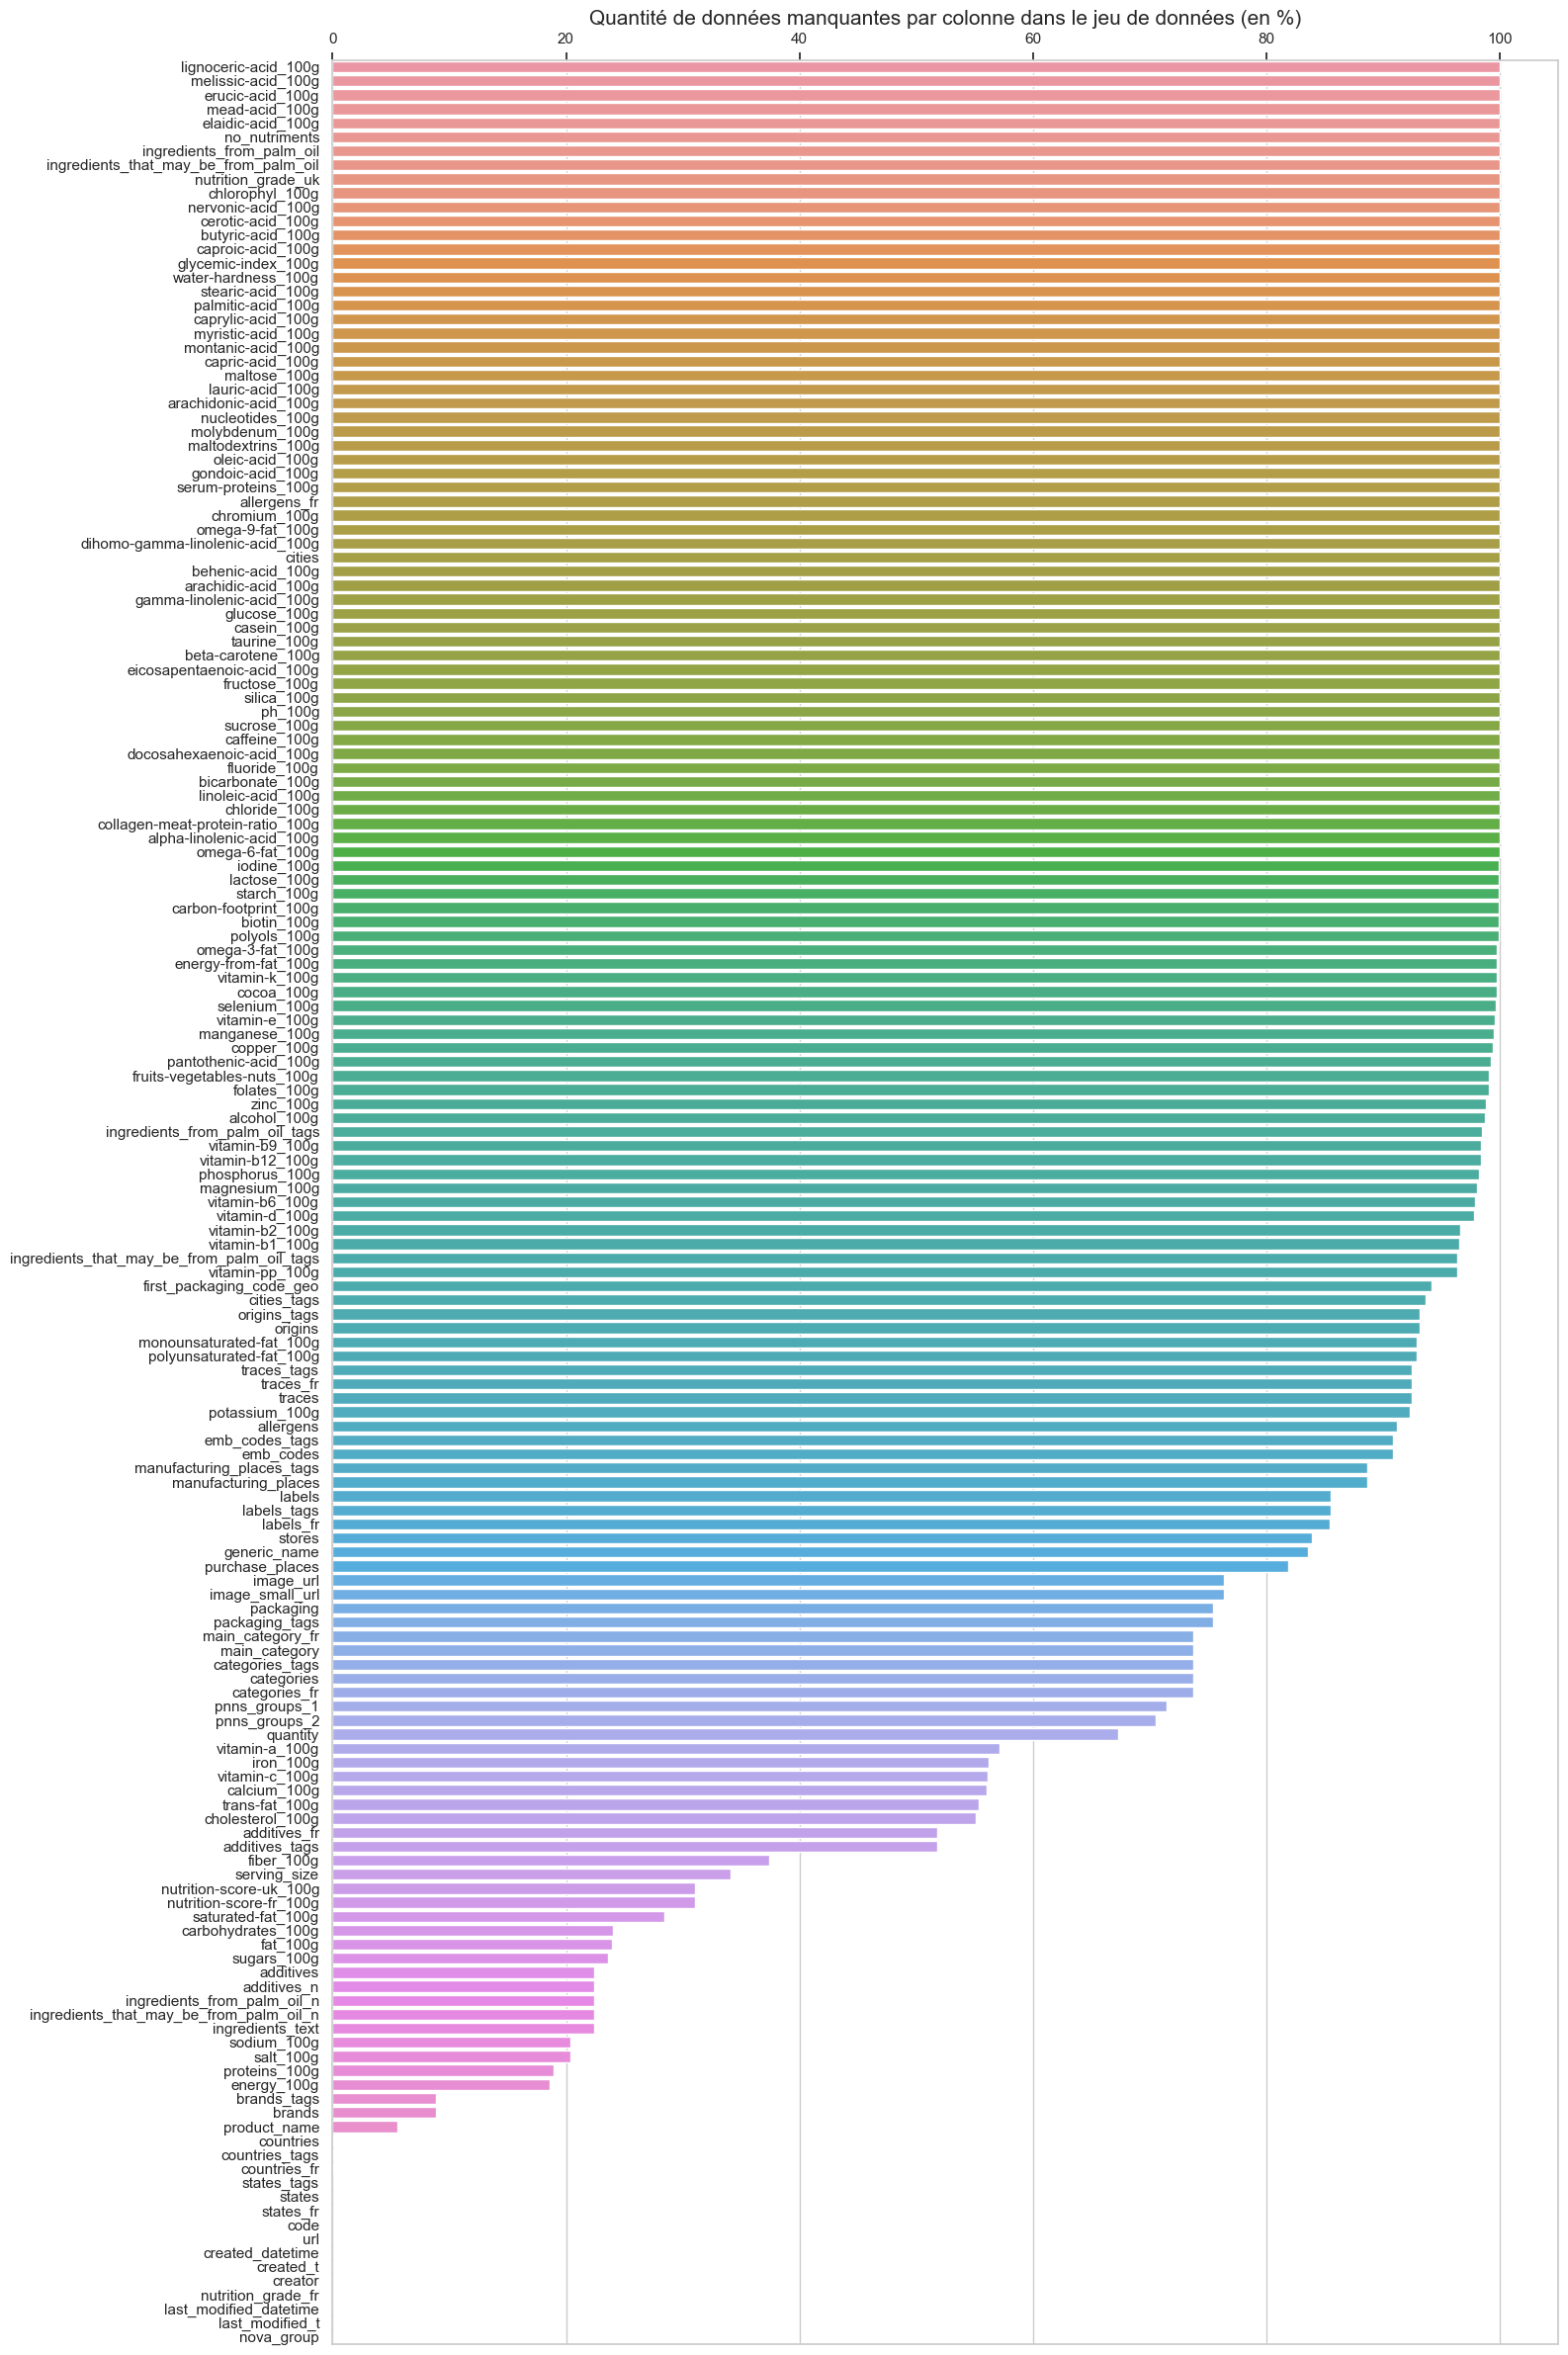

In [435]:
# Création d'une série contenant la proportion de NaN pour chaque colonne
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

# Configuration du style de la figure et définition de la taille
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))

# Création d'un graphique en barre avec la série précédente
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)

# Positionnement des étiquettes des axes des abscisses en haut de la figure
ax.xaxis.set_ticks_position('top')

# Définition du titre du graphique
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)

# Affichage du graphique
#plt.show()
#save_figure('Quantité de données manquantes par colonne dans le jeu de données (en %)')
save_figure_opt('Quantité de données manquantes par colonne dans le jeu de données (en %)', library='matplotlib')

Affiche la répartition des proportions de NaN dans un jeu de données. 
Création d'un histogramme avec les proportions de NaN en abscisse et la densité en ordonnée

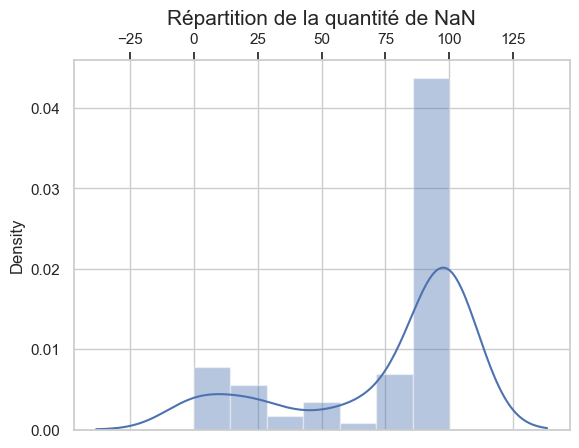

In [436]:
# Configuration du style du graphique avec Seaborn
sns.set(style="whitegrid")

# Création d'un histogramme avec la distribution des proportions de NaN
ax = sns.distplot(proportion_nan.values)

# Positionnement des étiquettes des axes des abscisses en haut de la figure
ax.xaxis.set_ticks_position('top')

# Définition du titre du graphique
plt.title('Répartition de la quantité de NaN', size=15)

# Affichage du graphique 
#plt.show()
#save_figure('Répartition de la quantité de NaN')
save_figure_opt('Répartition de la quantité de NaN', library='matplotlib')

In [437]:
df_sh = df.shape
df_sh
# Description générale du dataframe
desc = data.describe(include='all')

# Types et contenu des colonnes
desc_type = pd.DataFrame(data.dtypes, columns=['type']).T
nb_null = (df_sh[0]-desc.loc["count"].T)
pct_null = (df_sh[0]-desc.loc["count"].T)*100/df_sh[0]
desc_null = pd.DataFrame([nb_null, pct_null], index=['nb null','pct null'])

# Concaténation des statistiques générales, des types et des valeurs manquantes
desc = pd.concat([desc_type, desc_null, desc])
desc


code  \
type      object          
nb null   23.0            
pct null  0.00717         
count     320749.0        
unique    320638.0        
top       24463061071.0   
freq      2.0             
mean      NaN             
std       NaN             
min       NaN             
25%       NaN             
50%       NaN             
75%       NaN             
max       NaN             

                                                                                                 url  \
type      object                                                                                       
nb null   23.0                                                                                         
pct null  0.00717                                                                                      
count     320749                                                                                       
unique    320749                                                                                       
top       http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
freq      1                                                                                            
mean      NaN                                                                                          
std       NaN                                                                                          
min       NaN                                                                                          
25%       NaN                                                                                          
50%       NaN                                                                                          
75%       NaN                                                                                          
max       NaN                                                                                          

                  creator     created_t      created_datetime last_modified_t  \
type      object           object        object                object           
nb null   2.0              3.0           9.0                   0.0              
pct null  0.000623         0.000935      0.002806              0.0              
count     320770           320769.0      320763                320772.0         
unique    3535             189636.0      189568                180639.0         
top       usda-ndb-import  1489077120.0  2017-03-09T10:37:09Z  1439141742.0     
freq      169868           20.0          20                    33.0             
mean      NaN              NaN           NaN                   NaN              
std       NaN              NaN           NaN                   NaN              
min       NaN              NaN           NaN                   NaN              
25%       NaN              NaN           NaN                   NaN              
50%       NaN              NaN           NaN                   NaN              
75%       NaN              NaN           NaN                   NaN              
max       NaN              NaN           NaN                   NaN              

         last_modified_datetime product_name  \
type      object                 object        
nb null   0.0                    17762.0       
pct null  0.0                    5.537266      
count     320772                 303010        
unique    180495                 221347        
top       2015-08-09T17:35:42Z   Ice Cream     
freq      33                     410           
mean      NaN                    NaN           
std       NaN                    NaN           
min       NaN                    NaN           
25%       NaN                    NaN           
50%       NaN                    NaN           
75%       NaN                    NaN           
max       NaN                    NaN           

                                                 generic_name   quantity  \
type      object                       

In [361]:
# Checking columns in df

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')
total_columns = len(data.columns)
print(total_columns)   


code | url | creator | created_t | created_datetime | last_modified_t | 
last_modified_datetime | product_name | generic_name | quantity | packaging | packaging_tags | 
brands | brands_tags | categories | categories_tags | categories_fr | origins | 
origins_tags | manufacturing_places | manufacturing_places_tags | labels | labels_tags | labels_fr | 
emb_codes | emb_codes_tags | first_packaging_code_geo | cities | cities_tags | purchase_places | 
stores | countries | countries_tags | countries_fr | ingredients_text | allergens | 
allergens_fr | traces | traces_tags | traces_fr | serving_size | no_nutriments | 
additives_n | additives | additives_tags | additives_fr | ingredients_from_palm_oil_n | ingredients_from_palm_oil | 
ingredients_from_palm_oil_tags | ingredients_that_may_be_from_palm_oil_n | ingredients_that_may_be_from_palm_oil | ingredients_that_may_be_from_palm_oil_tags | nutrition_grade_uk | nutrition_grade_fr | 
pnns_groups_1 | pnns_groups_2 | states | states_tags | states_

In [438]:
# Printing total nb and percentage of null

def print_null_pct(df):
    tot_null = df.isna().sum().sum()
    print('nb of null: ', tot_null, '\npct of null: ',
        '{:.1f}'.format(tot_null*100/(df.shape[0]*df.shape[1])))

print_null_pct(data)

nb of null:  39509027 
pct of null:  75.6


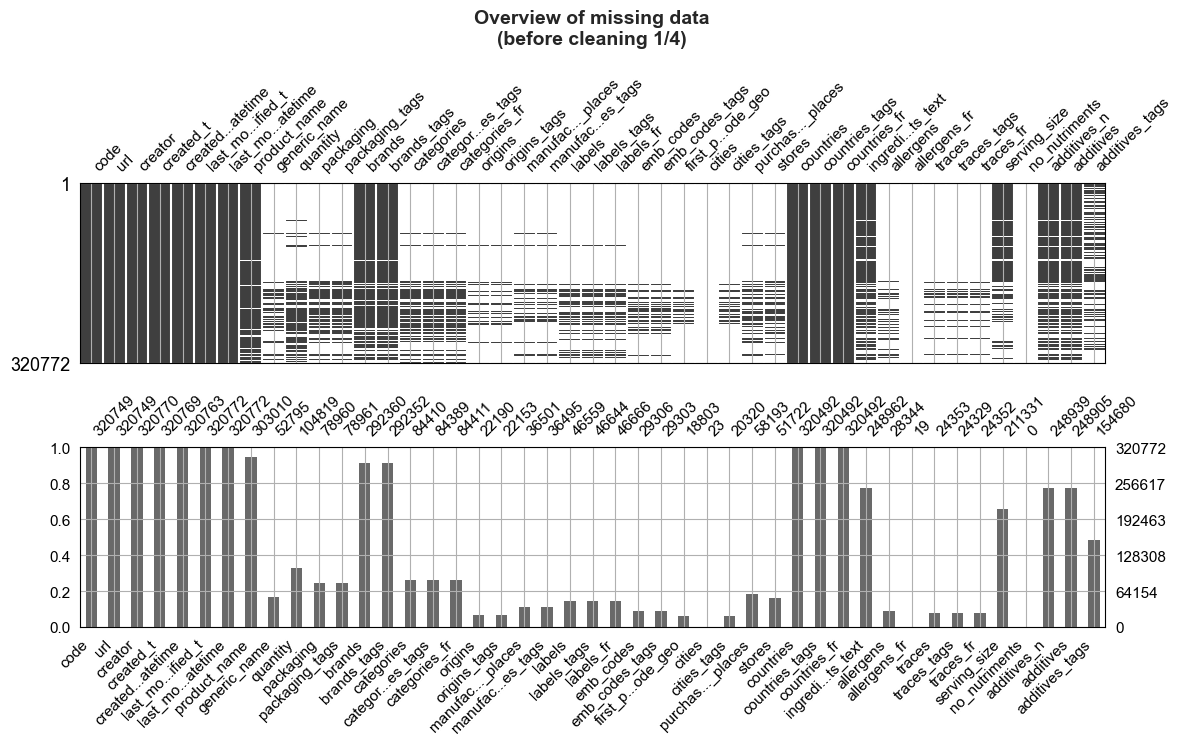

In [439]:
plot_export_missing(data, data.columns[0:45], 'C_0_3_missing_vals_1.png',
                    'Overview of missing data\n(before cleaning 1/4)',
                    shorten_label=True)

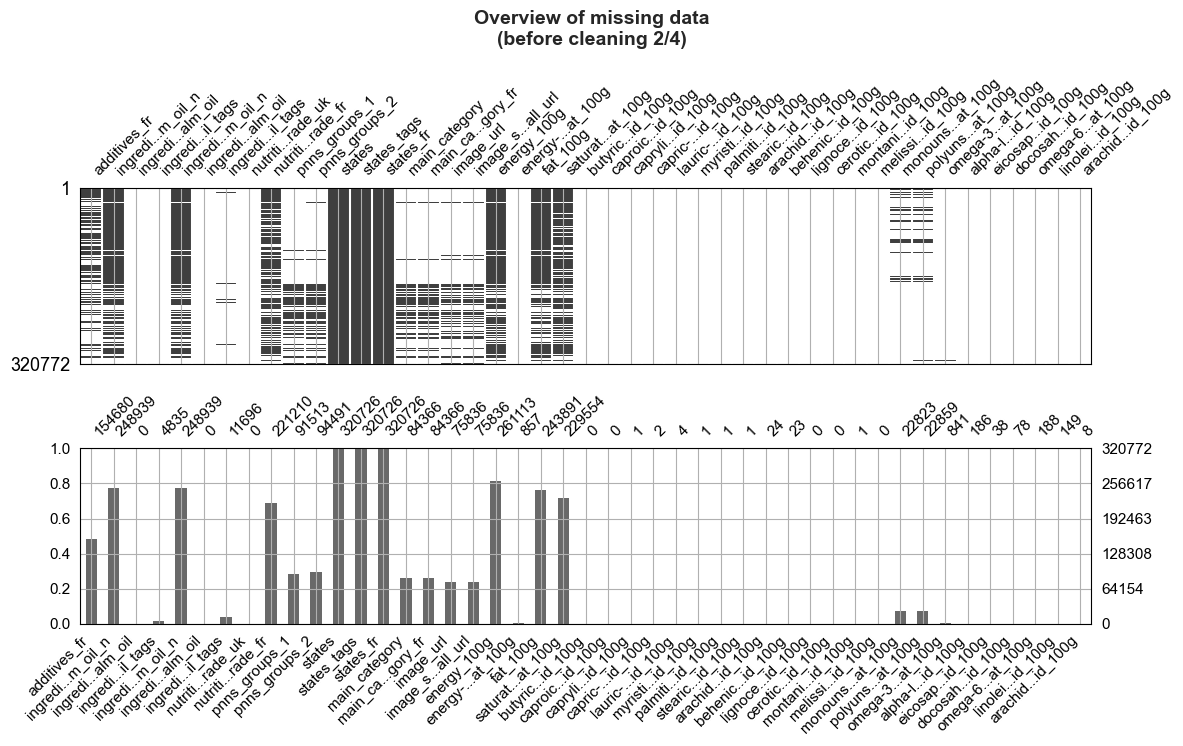

In [339]:
plot_export_missing(data, data.columns[45:90], 'C_0_3_missing_vals_2.png',
                    'Overview of missing data\n(before cleaning 2/4)',
                    shorten_label=True)

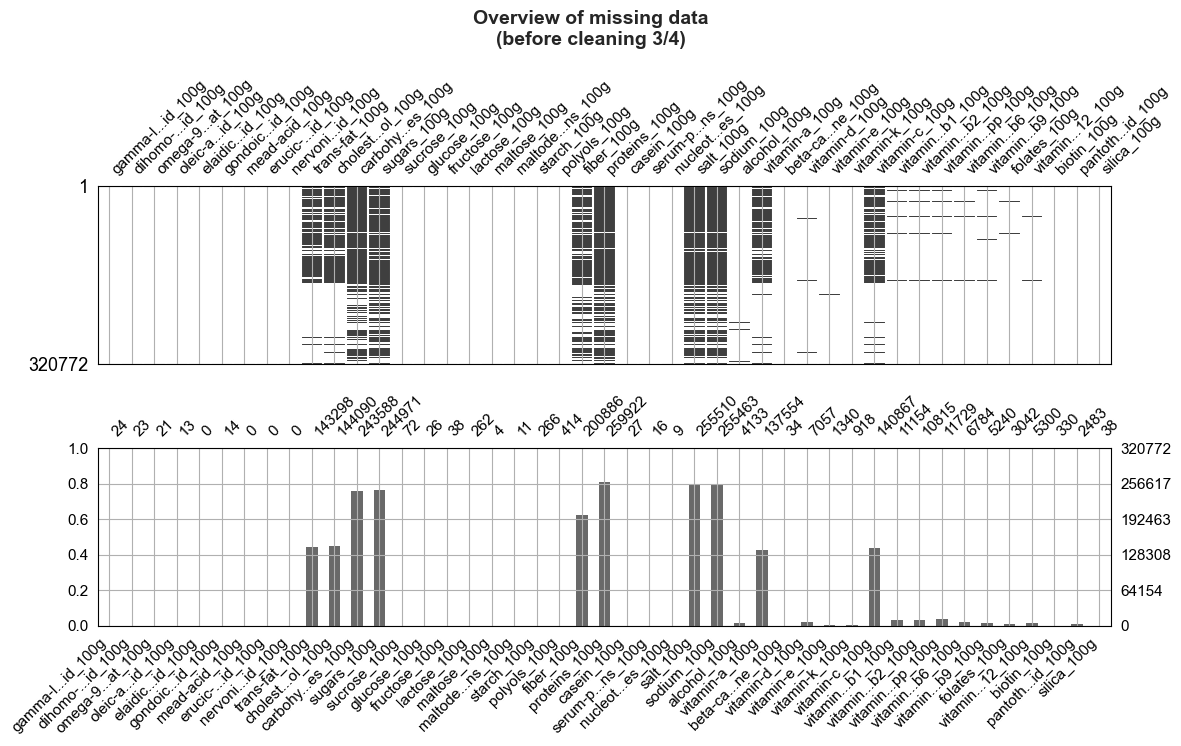

In [340]:
plot_export_missing(data, data.columns[90:135], 'C_0_3_missing_vals_3.png',
                    'Overview of missing data\n(before cleaning 3/4)',
                    shorten_label=True)

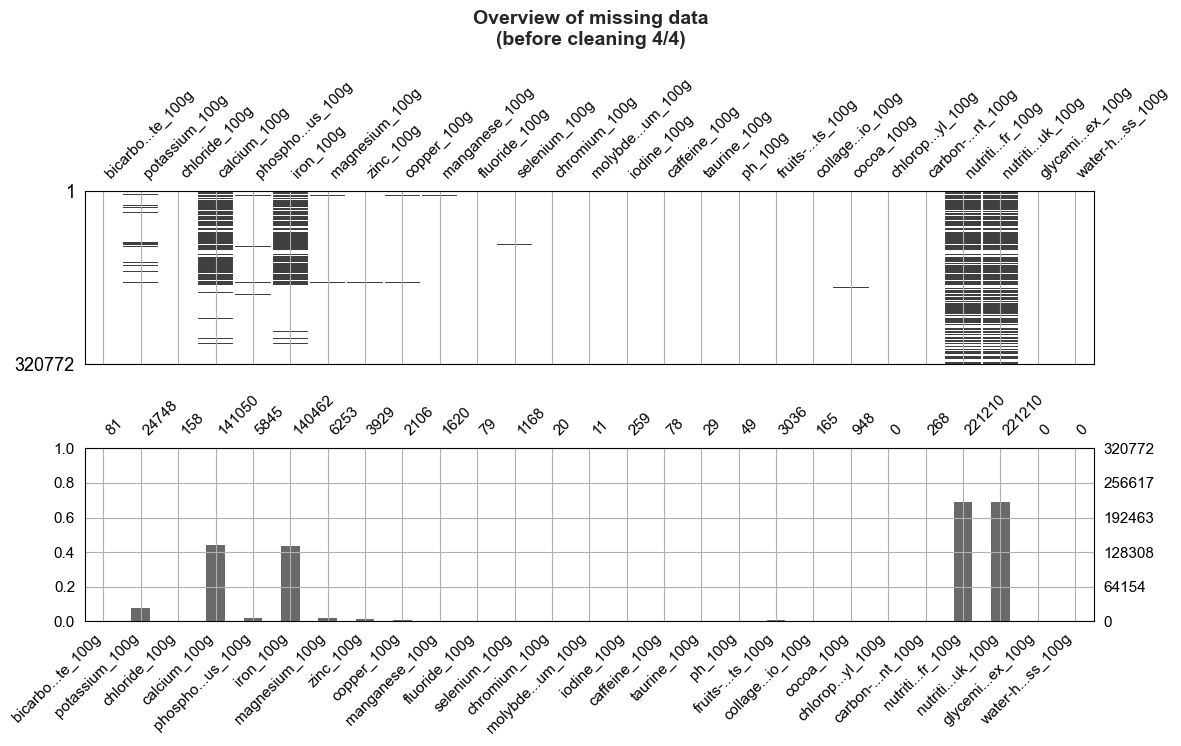

In [353]:
plot_export_missing(data, data.columns[135:181],'C_0_3_missing_vals_4.png',
                    'Overview of missing data\n(before cleaning 4/4)',
                    shorten_label=True)

Conclusions :
- categorical and quantitative columns
- 162 columns, 1385447 rows
- large number of missing data (76.2% of null, nombre de null:  39608589 )
 

In [453]:
import pandas as pd

# Charger le fichier CSV
data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')

def calculate_nova(row):
    energy = row['energy_100g'] if row['energy_100g'] and not pd.isna(row['energy_100g']) and row['energy_100g'] != 0 else 1
    saturated_fat = row['saturated-fat_100g'] if row['saturated-fat_100g'] and not pd.isna(row['saturated-fat_100g']) and row['saturated-fat_100g'] != 0 else 0.1
    sugar = row['sugars_100g'] if row['sugars_100g'] and not pd.isna(row['sugars_100g']) and row['sugars_100g'] != 0 else 0.1
    sodium = row['sodium_100g'] if row['sodium_100g'] and not pd.isna(row['sodium_100g']) and row['sodium_100g'] != 0 else 1
    fiber = row['fiber_100g'] if row['fiber_100g'] and not pd.isna(row['fiber_100g']) and row['fiber_100g'] != 0 else 0.1
    
    # Calculer le score Nova en utilisant la formule
    if energy is not None and saturated_fat is not None and sugar is not None and sodium is not None and fiber is not None:
        nova_score = 16 * (saturated_fat + sugar) / energy + 1.25 * sodium / energy + 0.5 * fiber
    else:
        nova_score = None

    return nova_score

# Ajouter une colonne 'nova_score' avec les scores Nova pour chaque aliment
data['nova_score'] = data.apply(calculate_nova, axis=1)
data['nova_score_arrondu'] = data['nova_score'].apply(lambda x: round(x))


In [454]:
# Afficher les scores Nova pour chaque aliment
data[['product_name', 'nova_score', 'nova_score_arrondu']].head(100)

product_name  nova_score  \
0   Farine de blé noir                            4.500000     
1   Banana Chips Sweetened (Whole)                2.106291     
2   Peanuts                                       3.698208     
3   Organic Salted Nut Mix                        3.606489     
4   Organic Polenta                               2.852867     
5   Breadshop Honey Gone Nuts Granola             3.962059     
6   Organic Long Grain White Rice                 0.052987     
7   Organic Muesli                                4.877321     
8   Organic Dark Chocolate Minis                  4.182772     
9   Organic Sunflower Oil                         0.082652     
10  Organic Adzuki Beans                          6.253195     
11  Organic Penne Pasta                           0.902890     
12  Zen Party Mix                                 3.410122     
13  Organic Golden Flax Seeds                     19.080042    
14  Organic Spicy Punks                           7.658093     
15  Cinnamon Nut Granola                          4.757375     
16  Organic Hazelnuts                             5.393406     
17  Organic Sweetened Banana Chips                1.956525     
18  Lotus Organic Brown Jasmine Rice              1.124254     
19  Organic Oat Groats                            4.802128     
20  Energy Power Mix                              2.937254     
21  Antioxidant Mix - Berries & Chocolate         3.630568     
22  Organic Quinoa Coconut Granola With Mango     4.836745     
23  Fire Roasted Hatch Green Chile Almonds        5.067717     
24  Peanut Butter Power Chews                     2.491145     
25  Real Salt Granular                            50.571250    
26  Organic Unswt Berry Coconut Granola           4.755413     
27  Roasted Salted Black Pepper Cashews           1.751391     
28  Thai Curry Roasted Cashews                    1.740264     
29  Wasabi Tamari Almonds                         5.048233     
30  Organic Medium Shredded Coconut               3.589771     
31  Organic Red Quinoa                            4.570379     
32  Dark Chocolate Coconut Chews                  4.228041     
33  Seventh Heaven Organic Trail Mix              3.905626     
34  Organic Unsweetened Granola, Cinnamon Almond  4.966547     
35  Organic Blueberry Almond Granola              3.936752     
36  Sweeteners, Demerara Turbinado Sugar          1.071574     
37  Aunt Maple's Crunchy Granola                  3.769106     
38  Organic Coconut Chips                         8.370897     
39  Organic Black Beans                           12.227545    
40  Organic Whole Grain Emmer Farro               5.302937     
41  Organic Hard Red Wheat Berries                6.403333     
42  Aunt Ginger's Snappy Granola                  3.748755     
43  Dark Chocolate Sea Salt & Turbinado Almonds   4.132709     
44  Divinely Organic Granola                      4.766975     
45  Organic Black Chia Seeds                      19.678711    
46  Filet de bœuf                                 4.500000     
47  Marks % Spencer 2 Blueberry Muffins           0.052941     
48  NaN                                           4.500000     
49  Organic French Green Lentils                  7.848779     
50  Organic Garbanzo Beans                        7.553211     
51  Organic Green Split Peas                      14.452040    
52  Organic Small Red Chili Beans                 22.266046    
53  Organic Small White Beans                     13.372188    
54  Organic Grey-Green Lentils                    16.652028    
55  Organic Yellow Split Peas                     14.540940    
56  Organic Mung Beans                            7.852183     
57  Organic Baby Lima Beans                       13.453269    
58  Organic Dark Red Kidney Bean                  6.528564     
59  Coconut Almond Granola                        3.784589     
60  Super Nutty Granola                           3.772335     
61  Maple Almond Granola                          4.672335     
62  

In [440]:
#  'cholesterol_100g',
#        'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
#        'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
#        'calcium_100g', 'iron_100g'
# Chargement du fichier CSV dans un dataframe
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

# Création d'une nouvelle colonne score_nutritionnel
df["score_nutritionnel"] = 0

# Assignation de points en fonction de la quantité de nutriments
df["score_nutritionnel"] += 2 * df["energy_100g"].fillna(0) / 1000
df["score_nutritionnel"] += 0.1 * (df["fat_100g"].fillna(0) + df["saturated-fat_100g"].fillna(0)) * 10
df["score_nutritionnel"] += 0.1 * df["sugars_100g"].fillna(0) * 10
df["score_nutritionnel"] += 0.4 * (df["fiber_100g"].fillna(0) + df["proteins_100g"].fillna(0)) * 10
df["score_nutritionnel"] += 0.1 * df["sodium_100g"].fillna(0) * 10

# Assignation de la lettre correspondant au score
df["nutriscore_grade"] = np.nan
df.loc[df["score_nutritionnel"] <= -1, "nutriscore_grade"] = "A"
df.loc[(df["score_nutritionnel"] > -1) & (df["score_nutritionnel"] <= 2.99), "nutriscore_grade"] = "B"
df.loc[(df["score_nutritionnel"] > 2.99) & (df["score_nutritionnel"] <= 10.99), "nutriscore_grade"] = "C"
df.loc[(df["score_nutritionnel"] > 10.99) & (df["score_nutritionnel"] <= 18), "nutriscore_grade"] = "D"
df.loc[df["score_nutritionnel"] > 18, "nutriscore_grade"] = "E"

# Enregistrement du dataframe modifié dans un nouveau fichier CSV
#df.to_csv("fr.openfoodfacts.org.products.with_nutriscore.csv", index=False)
# Sélectionner les colonnes souhaitées
df_selected = df.loc[:, ["product_name", "score_nutritionnel","nutriscore_grade","nutrition_grade_fr"]]

# Afficher les résultats
df_selected.head(1)

product_name  \
0    Farine de blé noir                                               
1    Banana Chips Sweetened (Whole)                                   
2    Peanuts                                                          
3    Organic Salted Nut Mix                                           
4    Organic Polenta                                                  
5    Breadshop Honey Gone Nuts Granola                                
6    Organic Long Grain White Rice                                    
7    Organic Muesli                                                   
8    Organic Dark Chocolate Minis                                     
9    Organic Sunflower Oil                                            
10   Organic Adzuki Beans                                             
11   Organic Penne Pasta                                              
12   Zen Party Mix                                                    
13   Organic Golden Flax Seeds                                        
14   Organic Spicy Punks                                              
15   Cinnamon Nut Granola                                             
16   Organic Hazelnuts                                                
17   Organic Sweetened Banana Chips                                   
18   Lotus Organic Brown Jasmine Rice                                 
19   Organic Oat Groats                                               
20   Energy Power Mix                                                 
21   Antioxidant Mix - Berries & Chocolate                            
22   Organic Quinoa Coconut Granola With Mango                        
23   Fire Roasted Hatch Green Chile Almonds                           
24   Peanut Butter Power Chews                                        
25   Real Salt Granular                                               
26   Organic Unswt Berry Coconut Granola                              
27   Roasted Salted Black Pepper Cashews                              
28   Thai Curry Roasted Cashews                                       
29   Wasabi Tamari Almonds                                            
30   Organic Medium Shredded Coconut                                  
31   Organic Red Quinoa                                               
32   Dark Chocolate Coconut Chews                                     
33   Seventh Heaven Organic Trail Mix                                 
34   Organic Unsweetened Granola, Cinnamon Almond                     
35   Organic Blueberry Almond Granola                                 
36   Sweeteners, Demerara Turbinado Sugar                             
37   Aunt Maple's Crunchy Granola                                     
38   Organic Coconut Chips                                            
39   Organic Black Beans                                              
40   Organic Whole Grain Emmer Farro                                  
41   Organic Hard Red Wheat Berries                                   
42   Aunt Ginger's Snappy Granola                                     
43   Dark Chocolate Sea Salt & Turbinado Almonds                      
44   Divinely Organic Granola                                         
45   Organic Black Chia Seeds                                         
46   Filet de bœuf                                                    
47   Marks % Spencer 2 Blueberry Muffins                              
48   NaN                                                              
49   Organic French Green Lentils                                     
50   Organic Garbanzo Beans                                           
51   Organic Green Split Peas                                         
52   Organic Small Red Chili Beans                                    
53   Organic Small White Beans                                        
54   Organic Grey-Green Lentils                                       
55   Organic Yellow Split Peas                                        
56   Org

In [369]:
import pandas as pd

# Charger le fichier CSV
#data = pd.read_csv("openfoodfacts.csv", delimiter='\t', encoding='utf-8')
data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')
# Supprimer les lignes sans valeur pour les colonnes pertinentes
data = data.dropna(subset=['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g'])

# Calculer les points positifs et négatifs pour chaque aliment
positives = data['energy_100g'] / 335.0 + data['saturated-fat_100g'] / 1.5 + data['sugars_100g'] / 4.5 + data['fiber_100g'] / 0.9
negatives = data['salt_100g'] / 0.4

# Calculer le score nutritionnel pour chaque aliment
scores = positives - negatives

# Affecter une lettre pour chaque score en fonction des seuils
data['nutrition_grade_fr_test'] = pd.cut(scores, bins=[-15, -1, 2, 10, 40], labels=['a', 'b', 'c', 'd'])

# Afficher les noms d'aliments et leur score nutritionnel correspondant
#print(data[['product_name', 'nutrition_grade_fr']])
ds = data[['product_name', 'nutrition_grade_fr_test', 'nutrition_grade_fr']]
ds.head(100)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\3926342202.py:5: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')


product_name  \
1    Banana Chips Sweetened (Whole)                        
2    Peanuts                                               
3    Organic Salted Nut Mix                                
7    Organic Muesli                                        
12   Zen Party Mix                                         
15   Cinnamon Nut Granola                                  
16   Organic Hazelnuts                                     
19   Organic Oat Groats                                    
20   Energy Power Mix                                      
21   Antioxidant Mix - Berries & Chocolate                 
22   Organic Quinoa Coconut Granola With Mango             
23   Fire Roasted Hatch Green Chile Almonds                
24   Peanut Butter Power Chews                             
26   Organic Unswt Berry Coconut Granola                   
27   Roasted Salted Black Pepper Cashews                   
28   Thai Curry Roasted Cashews                            
29   Wasabi Tamari Almonds                                 
32   Dark Chocolate Coconut Chews                          
34   Organic Unsweetened Granola, Cinnamon Almond          
35   Organic Blueberry Almond Granola                      
38   Organic Coconut Chips                                 
42   Aunt Ginger's Snappy Granola                          
43   Dark Chocolate Sea Salt & Turbinado Almonds           
59   Coconut Almond Granola                                
60   Super Nutty Granola                                   
61   Maple Almond Granola                                  
65   Tricolor Tortellini                                   
70   10-Grain Pancake Mix                                  
77   Granola Cranberry And Acai                            
80   Peanuts, Mixed Nuts                                   
85   Foods, Spanish Peanuts                                
86   Foods, Honey Roasted Nut Mix                          
87   Roasted Salted Sunflower Seeds                        
88   Foods, Deluxe Nut Mix                                 
89   Foods, Honey Roast Nuts & Fruit Mix                   
92   Organic Trail Mix                                     
95   Organic Raw Pumpkin Seeds                             
104  Whole Wheat 'N Honey Fig Bars                         
105  Chocolate Nut Crunch                                  
106  Lion Peanut x2                                        
107  Milk Chocolate Peanut Butter Malt Balls               
108  Organic Tamari Pumpkin Seed                           
109  Yogurt Pretzels                                       
118  Swiss-Style Muesli                                    
146  Cranberries                                           
147  Turkish Apricots                                      
148  Banana Chips Sweetened                                
149  Granola Honey Almonds                                 
150  Chili Mango                                           
151  Milk Chocolate Pretzels                               
152  Peanuts                                               
155  Organic Salted Pistachios                             
171  Organic Whole Cashews                                 
173  Fresh Organic Carrots                                 
174  Salade Cesar                                          
180  Chaussons tressés aux pommes                          
181  Pain Burger Artisan                                   
185  Quiche Lorraine                                       
190  Mini Confettis                                        
191  Praliné Amande Et Noisette                            
195  Butter Croissants                                     
196  Wild Blueberry Muffins                                
197  Bolillos                                              
198  Biscuit                                               
199  Biscuit                                               
200  Oatmeal Raisin Cookie                                 
201  Sliced Plain Bagel 

In [400]:
import pandas as pd

# Charger le fichier CSV

data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')

# Supprimer les espaces autour des valeurs de la colonne nutrition_grade_fr
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].str.strip()

# Remplacer les valeurs manquantes de la colonne nutrition_grade_fr par la lettre E
data['nutrition_grade_fr'].fillna(value='e', inplace=True)

# Définir une fonction pour mapper la lettre du grade nutritionnel aux groupes nova
def map_nova_group(nutrition_grade):
    if nutrition_grade in ['a']:
        return 1
    elif nutrition_grade in ['b']:
        return 2
    elif nutrition_grade in ['c']:
        return 3
    elif nutrition_grade in ['d']:
        return 4
    elif nutrition_grade == 'e':
        return 4
    else:
        return 4

# Appliquer la fonction à la colonne nutrition_grade_fr pour créer la colonne nova_group
data['nova_group'] = data['nutrition_grade_fr'].apply(map_nova_group)


# Afficher les 5 premières lignes avec les colonnes nutrition_grade_fr et nova_group
print(data[['product_name','nutrition_grade_fr', 'nova_group']].head(100))



C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\3973071255.py:5: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')


                                    product_name nutrition_grade_fr  \
0   Farine de blé noir                            e                   
1   Banana Chips Sweetened (Whole)                d                   
2   Peanuts                                       b                   
3   Organic Salted Nut Mix                        d                   
4   Organic Polenta                               e                   
5   Breadshop Honey Gone Nuts Granola             e                   
6   Organic Long Grain White Rice                 e                   
7   Organic Muesli                                c                   
8   Organic Dark Chocolate Minis                  e                   
9   Organic Sunflower Oil                         e                   
10  Organic Adzuki Beans                          e                   
11  Organic Penne Pasta                           e                   
12  Zen Party Mix                                 d                   
13  Or

Réduction de l'utilisation de la mémoire 

Afin de faciliter la manipulation, nous changeons le format d'encodage

les entiers et les flottants doivent être downcastés
les objets doivent être modifiés en catégorie (si le nombre de valeurs uniques est inférieur à la moitié du nombre de lignes)
NB : Si nous connaissons déjà le format des données, nous pouvons spécifier le format de chaque colonne lors du chargement des données dans une dataframe pandas : pd.read_csv('path', dtype=new_dtypes)

In [392]:
## Changing format of object and float64 columns
# Charger le fichier CSV
df = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')
new_dtypes = {}

# object -> category (if nb unique < half total nb of rows and not XXX_100g)
for col in df.columns.values:
    if df[col].dtype == 'object' :
      if len(df[col].unique()) / len(df[col]) < 0.5:
        new_dtypes[col] = 'category'
      else:
        new_dtypes[col] = 'object'

# float64 -> float32
for col in df.columns.values:
    if df[col].dtype == 'float64':
      if df[col].notna().sum()!=0: # 1% sample columns happening to be all null 
        new_dtypes[col] = 'float32'

# int64 -> int8
for col in df.columns.values:
    if df[col].dtype == 'int64':
        new_dtypes[col] = 'int8'
        
print(new_dtypes)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\1469024872.py:3: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')


{'code': 'object', 'url': 'object', 'creator': 'category', 'created_t': 'object', 'created_datetime': 'object', 'last_modified_t': 'object', 'last_modified_datetime': 'object', 'product_name': 'object', 'generic_name': 'category', 'quantity': 'category', 'packaging': 'category', 'packaging_tags': 'category', 'brands': 'category', 'brands_tags': 'category', 'categories': 'category', 'categories_tags': 'category', 'categories_fr': 'category', 'origins': 'category', 'origins_tags': 'category', 'manufacturing_places': 'category', 'manufacturing_places_tags': 'category', 'labels': 'category', 'labels_tags': 'category', 'labels_fr': 'category', 'emb_codes': 'category', 'emb_codes_tags': 'category', 'first_packaging_code_geo': 'category', 'cities': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries': 'category', 'countries_tags': 'category', 'countries_fr': 'category', 'ingredients_text': 'object', 'allergens': 'category', 'allergens_fr': 'c

In [393]:
## Forcing XXX_100g and nutriscore columns to 'float32' and nova to 'object'

X_100g_cols = df.columns[df.columns.str.contains('_100g')]
for col in X_100g_cols:
    new_dtypes[col] = 'float32'
#df['nova_group'] = df['nova_group'].astype('object') 

In [386]:
# Charger le fichier CSV
data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')
df.info(memory_usage='deep')

C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\3205068756.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 1.7 GB


In [394]:
# Charger le fichier CSV
data = pd.read_csv("data/fr.openfoodfacts.org.products.csv",dtype=new_dtypes,header=0, sep='\t', low_memory=False, encoding ='utf-8')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: category(47), float32(102), float64(4), object(9)
memory usage: 770.6 MB


## Traitement des outliers

### Intuitions

Essayons 2 méthodes de traitement des outliers sur une feature de notre jeu de données:

In [265]:
def delete_outliers_std(dataframe):
    '''Suppression des outliers trop éloignés de la moyenne'''
    
    # Parcours des colonnes numériques de la dataframe
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        
        # Remplacement des valeurs en dehors de 2 écart-types de la moyenne par NaN
        dataframe.loc[dataframe[column] > dataframe[column].mean() + 2 * dataframe[column].std()] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].mean() - 2 * dataframe[column].std()] = np.nan
        
        # Remplacement des valeurs négatives par NaN
        dataframe.loc[dataframe[column] < 0] = np.nan
        
    # Retourne la dataframe modifiée
    return dataframe
    
def delete_outliers_percentiles(dataframe):
    '''Suppression des outliers du centile extrême'''
    
    # Parcours des colonnes numériques de la dataframe
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        
        # Remplacement des valeurs en dehors du 0.5% et 99.5% percentiles par NaN
        dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
        
        # Remplacement des valeurs négatives par NaN
        dataframe.loc[dataframe[column] < 0] = np.nan
        
    # Retourne la dataframe modifiée
    return dataframe


Création d'une copie du dataframe original et sélectionne uniquement les colonnes 'energy_100g' et 'salt_100g'. 
Ensuite, suppression des outliers des données de la colonne 'salt_100g' 
et stocke les résultats dans les variables 'salt_std' et 'salt_percentiles'.

In [266]:
#salt_std = delete_outliers_std(data.copy()[['energy_100g','salt_100g']])['salt_100g']
#salt_percentiles = delete_outliers_percentiles(data.copy()[['energy_100g','salt_100g']])['salt_100g']

# Copie du dataframe original et sélection des colonnes energy_100g et salt_100g
subset_data = data.copy()[['energy_100g','salt_100g']]

# Suppression des outliers avec la fonction delete_outliers_std pour la colonne salt_100g
# et récupération de cette colonne dans la variable salt_std
salt_std = delete_outliers_std(subset_data)['salt_100g']

# Suppression des outliers avec la fonction delete_outliers_percentiles pour la colonne salt_100g
# et récupération de cette colonne dans la variable salt_percentiles
salt_percentiles = delete_outliers_percentiles(subset_data)['salt_100g']



In [267]:
print('Moyenne de salt_100g : ',data['salt_100g'].mean())
print('Ecart type de salt_100g : ',data['salt_100g'].std())

Moyenne de salt_100g :  2.0286239493369744
Ecart type de salt_100g :  128.26945441689932


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

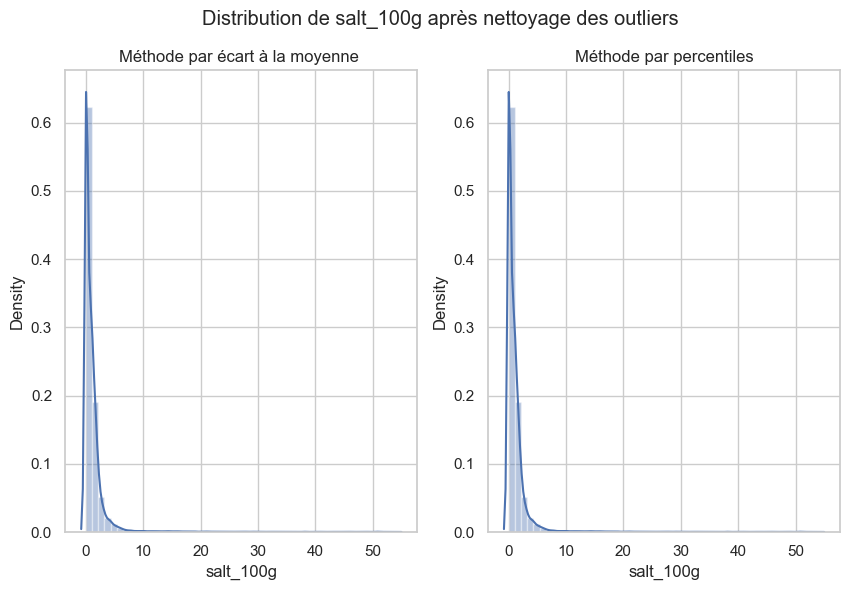

In [268]:
# création d'une figure contenant 2 sous-graphes côte-à-côte
f, axes = plt.subplots(1,2, figsize=(10,6))

# titre de la figure
f.suptitle("Distribution de salt_100g après nettoyage des outliers")

# création du premier sous-graphique représentant la distribution de salt_100g après nettoyage des outliers par la méthode de suppression par écart à la moyenne
ax1 = sns.distplot(salt_std.dropna(), ax=axes[0])
ax1.set_title("Méthode par écart à la moyenne ")

# création du deuxième sous-graphique représentant la distribution de salt_100g après nettoyage des outliers par la méthode de suppression par percentiles
ax2 = sns.distplot(salt_percentiles.dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")



In [271]:
# Concaténation des valeurs de la standard deviation et de la colonne "salt_100g" dans une seule série
# et suppression des doublons pour obtenir une série des outliers identifiés par la méthode des écarts types
outliers_std = pd.concat([salt_std, data['salt_100g']]).drop_duplicates(keep=False)

# Concaténation des valeurs des percentiles et de la colonne "salt_100g" dans une seule série
# et suppression des doublons pour obtenir une série des outliers identifiés par la méthode des percentiles
outliers_percentiles = pd.concat([salt_percentiles, data['salt_100g']]).drop_duplicates(keep=False)



In [272]:
print(outliers_std.shape)
print(outliers_percentiles.shape)

(194,)
(194,)


La méthode avec l'écart à la moyenne n'a identifié qu'un seul outlier. Ce résultat s'interprète par la moyenne importante et l'écart type importants causés par les outliers du jeu de données. On a un écart type de 91 285 alors que la valeur est donnée pour 100 g, l'écart type doit devrait être inférieur à 100g. Il est très probable que des  valeurs incohérentes n'ont pas été retirées du jeu de données.

La méthode avec les percentiles donne des résultats plus cohérents en termes d'ordre de grandeur. Cependant, elle présente le risque d'écarter des données cohérentes (par exemple ici les valeurs entre 40 et 100)

La fonction présenté ci-après propose de supprimer le centile extrême, les valeurs supérieures à 100 g (pour les distributions en base 100 g), ainsi que les données trop éloignées de leurs voisins (distance de Minkowski)

### Fonction

Cette fonction supprime les outliers (valeurs extrêmes) du dataframe en excluant le centile le plus extrême, en supprimant les données négatives et les valeurs supérieures à 100 g pour les indices ramenés à 100 g.

In [273]:
# Importation de la fonction KDTree de la bibliothèque sklearn.neighbors
from sklearn.neighbors import KDTree

# Fonction pour supprimer les valeurs extrêmes du dataset
def delete_univariate_outliers(dataframe):
    '''
    Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extrême
    Suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g
    '''

    # Boucle sur les colonnes de type 'int32' et 'float64'
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        # Initialisation de deux listes pour stocker les index des valeurs extrêmes et des valeurs nulles
        index_nan = []
        index_nan_flat = []
        
        # Récupération des index des valeurs extrêmes en utilisant la méthode des quantiles
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)].index.tolist())
        # Récupération des index des valeurs négatives
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        # Pour les colonnes qui représentent des quantités en grammes, récupération des index des valeurs supérieures à 100 g
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        # Parcours des listes des index des valeurs extrêmes et des valeurs nulles pour les stocker dans une seule liste
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
        # Suppression des doublons dans la liste des index
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        # Remplacement des valeurs extrêmes par NaN
        dataframe[column].loc[index_nan_flat] = np.nan
            
    # Affichage du nombre de valeurs NaN dans le dataset
    print_control_shape_nan(dataframe)
            
    return dataframe



Cette fonction supprime les outliers multivariés d'un dataset en utilisant la distance de Minkowski des 3 plus proches voisins de chaque observation.

In [274]:
# Fonction pour supprimer les outliers multivariés
def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers éloignés de leurs plus proches voisins (discrimination du centile 
    le plus éloigné par la distance de minkowski de chaque observation à ses 3 plus proches voisins)'''

    # Sélection des colonnes numériques et suppression des NaN
    # Copie des données numériques du dataset et suppression des lignes qui contiennent des valeurs nulles
    numeric_data = dataframe.select_dtypes(['int32', 'float64']).copy().dropna(axis=0).dropna(axis=1)
    
    # Contrôle de la forme initiale du dataset
    print_control_shape_nan(dataframe)
    
    try:
        # Calcul des distances de Minkowski des 3 plus proches voisins pour chaque observation
        # Création d'un arbre de recherche KDTree pour les données numériques
        kdt = KDTree(numeric_data, leaf_size = 40, metric='minkowski')
        dist, ind = kdt.query(numeric_data, k=3, return_distance=True)
    
        # Ajout d'une colonne pour stocker la somme des distances de chaque observation à ses 3 plus proches voisins
        # Calcul de la distance de Minkowski pour chaque observation et stockage dans une nouvelle colonne
        numeric_data['3N_distance'] = np.sum(dist, axis=1) 
        
        # Suppression des observations dont la somme des distances est supérieure au 99ème centile
        numeric_data = numeric_data[numeric_data['3N_distance'] < numeric_data['3N_distance'].quantile(0.99)]
        
        # Récupération des indices des observations à supprimer dans le dataset initial
        index_to_drop = numeric_data.index.tolist()
        
        # Suppression des observations correspondantes dans le dataset initial
        dataframe = dataframe.drop(index_to_drop, axis=0)
    except ValueError:
        print('.........oops : trop de NaN dans le jeu de données, calcul de distance impossible')

    # Contrôle de la forme du dataset après suppression des outliers multivariés
    print_control_shape_nan(dataframe)
    
    return dataframe


In [275]:
def delete_outliers(dataframe):
    # Affichage de l'étape en cours
    print('........Suppression des outliers univariés')
    # Suppression des outliers univariés
    dataframe = delete_univariate_outliers(dataframe)
    # Affichage de l'étape en cours
    print('........Suppression des outliers multivariés')
    # Suppression des outliers multivariés
    dataframe = delete_multivariate_outliers(dataframe)
    # Retour du dataframe nettoyé
    return dataframe


In [276]:
a = clean_nan(data.head(10000).copy(), taux_nan_max = 0.80)

Nombre de colonnes supprimées : 120


In [277]:
delete_multivariate_outliers(a)

........Proportion de NaN : 8.0 %, Taille du jeu de données : (10000, 42)

........Proportion de NaN : 26.0 %, Taille du jeu de données : (2890, 42)



code  \
0     3087          
3     16087         
4     16094         
5     16100         
6     16117         
...     ...         
9984  11822552561   
9985  11822552578   
9989  11822555418   
9990  11822555425   
9991  11822562560   

                                                                                                                              url  \
0     http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao                                    
3     http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies                                      
4     http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill                                        
5     http://world-fr.openfoodfacts.org/produit/0000000016100/breadshop-honey-gone-nuts-granola-unfi                                
6     http://world-fr.openfoodfacts.org/produit/0000000016117/organic-long-grain-white-rice-lundberg                                
...                                                                                              ...                                
9984  http://world-fr.openfoodfacts.org/produit/0011822552561/flavored-seltzer-lemon-lime-big-win                                   
9985  http://world-fr.openfoodfacts.org/produit/0011822552578/sparkling-seltzer-original-big-win                                    
9989  http://world-fr.openfoodfacts.org/produit/0011822555418/refreshing-lemonade-made-with-real-fruit-juice-rite-aid-corporation   
9990  http://world-fr.openfoodfacts.org/produit/0011822555425/lemonade-strawberry-big-win                                           
9991  http://world-fr.openfoodfacts.org/produit/0011822562560/rite-aid-seltzer-water-lemon-lime-rite-aid-corporation                

                         creator   created_t      created_datetime  \
0     openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
3     usda-ndb-import             1489055731  2017-03-09T10:35:31Z   
4     usda-ndb-import             1489055653  2017-03-09T10:34:13Z   
5     usda-ndb-import             1489055651  2017-03-09T10:34:11Z   
6     usda-ndb-import             1489055730  2017-03-09T10:35:30Z   
...               ...                    ...                   ...   
9984  usda-ndb-import             1489071875  2017-03-09T15:04:35Z   
9985  usda-ndb-import             1489073143  2017-03-09T15:25:43Z   
9989  usda-ndb-import             1489073143  2017-03-09T15:25:43Z   
9990  usda-ndb-import             1489074431  2017-03-09T15:47:11Z   
9991  usda-ndb-import             1489075847  2017-03-09T16:10:47Z   

      last_modified_t last_modified_datetime  \
0     1474103893       2016-09-17T09:18:13Z    
3     1489055731       2017-03-09T10:35:31Z    
4     1489055653       2017-03-09T10:34:13Z    
5     1489055651       2017-03-09T10:34:11Z    
6     1489055730       2017-03-09T10:35:30Z    
...          ...                        ...    
9984  1489071875       2017-03-09T15:04:35Z    
9985  1489073143       2017-03-09T15:25:43Z    
9989  1489073144       2017-03-09T15:25:44Z    
9990  1489074431       2017-03-09T15:47:11Z    
9991  1489075847       2017-03-09T16:10:47Z    

                                        product_name  \
0     Farine de blé noir                               
3     Organic Salted Nut Mix                           
4     Organic Polenta                                  
5     Breadshop Honey Gone Nuts Granola                
6     Organic Long Grain White Rice                    
...                             ...                    
9984  Flavored Seltzer, Lemon Lime                     
9985  Sparkling Seltzer Original                       
9989  Refreshing Lemonade Made With Real Fruit Juice   
9990  Lemonade, Strawberry                             
9991  Rite Aid, Seltzer Water, Lemon & Lime            

                              brands                   brands_tags count

## Imputation des NaN par méthodes des kNN

### Intuition et test (voir fonction au chapitre suivant)

In [278]:
# Sélectionne les 10000 premières lignes de la copie du dataframe original "data"
# Supprime toutes les colonnes contenant plus de 80% de valeurs manquantes
data_test = clean_nan(data.copy().head(10000), 0.80)


Nombre de colonnes supprimées : 120


In [279]:
(data_test.head(100))

code  \
0   3087    
1   4530    
2   4559    
3   16087   
4   16094   
5   16100   
6   16117   
7   16124   
8   16193   
9   16513   
10  16612   
11  16650   
12  16872   
13  16933   
14  17497   
15  18012   
16  18050   
17  18173   
18  18197   
19  18227   
20  18265   
21  18289   
22  18319   
23  18340   
24  18357   
25  18371   
26  18388   
27  18395   
28  18401   
29  18418   
30  18449   
31  18456   
32  18500   
33  18517   
34  18524   
35  18555   
36  18562   
37  18579   
38  18630   
39  18708   
40  18753   
41  18760   
42  18869   
43  18883   
44  18937   
45  18944   
46  24600   
47  27083   
48  27205   
49  30038   
50  30540   
51  30557   
52  30564   
53  30571   
54  30595   
55  30625   
56  30649   
57  30717   
58  30724   
59  31097   
60  31141   
61  31172   
62  31233   
63  31288   
64  32070   
65  32117   
66  32384   
67  32858   
68  32896   
69  33015   
70  33060   
71  33084   
72  33268   
73  33503   
74  33572   
75  33589   
76  33626   
77  33640   
78  33657   
79  33664   
80  33688   
81  34135   
82  34142   
83  34241   
84  34265   
85  34425   
86  34432   
87  34449   
88  34456   
89  34470   
90  34548   
91  34562   
92  34623   
93  34715   
94  34784   
95  34791   
96  35071   
97  35170   
98  35279   
99  35286   

                                                                                                                         url  \
0   http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao                                 
1   http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole                                       
2   http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser                                               
3   http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies                                   
4   http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill                                     
5   http://world-fr.openfoodfacts.org/produit/0000000016100/breadshop-honey-gone-nuts-granola-unfi                             
6   http://world-fr.openfoodfacts.org/produit/0000000016117/organic-long-grain-white-rice-lundberg                             
7   http://world-fr.openfoodfacts.org/produit/0000000016124/organic-muesli-daddy-s-muesli                                      
8   http://world-fr.openfoodfacts.org/produit/0000000016193/organic-dark-chocolate-minis-equal-exchange                        
9   http://world-fr.openfoodfacts.org/produit/0000000016513/organic-sunflower-oil-napa-valley-naturals                         
10  http://world-fr.openfoodfacts.org/produit/0000000016612/organic-adzuki-beans-unfi                                          
11  http://world-fr.openfoodfacts.org/produit/0000000016650/organic-penne-pasta-gardentime                                     
12  http://world-fr.openfoodfacts.org/produit/0000000016872/zen-party-mix-sunridge                                             
13  http://world-fr.openfoodfacts.org/produit/0000000016933/organic-golden-flax-seeds-unfi                                     
14  http://world-fr.openfoodfacts.org/produit/0000000017497/organic-spicy-punks-eden                                           
15  http://world-fr.openfoodfacts.org/produit/0000000018012/cinnamon-nut-granola-grizzlies                                     
16  http://world-fr.openfoodfacts.org/produit/0000000018050/organic-hazelnuts-grizzlies                                        
17  http://world-fr.openfoodfacts.org/produit/0000000018173/organic-sweetened-banana-chips-unfi                                
18  http://world-fr.openfoodfacts.org/produit/0000000018197/lotus-organic-brown-jasmine-rice-unfi                              
19  http://world-fr.openfoodfacts.org/produit/0000000018227/organic-oat-groats-pcc                                             
20 

In [280]:
# Sélectionne les colonnes numériques du DataFrame data_test
# Extraction des colonnes numériques du jeu de données `data_test`
numeric_columns = data_test.select_dtypes(['int32', 'float64']).columns

# Affiche les noms des colonnes numériques
numeric_columns


Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [281]:
# Extraction des données numériques du jeu de données `data_test` pour les colonnes numériques
data_test[numeric_columns]


additives_n  ingredients_from_palm_oil_n  \
0    NaN          NaN                            
1     0.0          0.0                           
2     0.0          0.0                           
3     0.0          0.0                           
4     0.0          0.0                           
...   ...          ...                           
9995  3.0          0.0                           
9996  2.0          0.0                           
9997  5.0          0.0                           
9998  3.0          0.0                           
9999  3.0          0.0                           

      ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
0    NaN                                      NaN          NaN         
1     0.0                                      2243.0       28.57      
2     0.0                                      1941.0       17.86      
3     0.0                                      2540.0       57.14      
4     0.0                                      1552.0       1.43       
...   ...                                         ...        ...       
9995  0.0                                      937.0        11.94      
9996  0.0                                      937.0        11.94      
9997  1.0                                      937.0        14.93      
9998  0.0                                      849.0        10.14      
9999  0.0                                      937.0        11.94      

      saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
0    NaN                 NaN             NaN                 
1     28.57               0.00            0.018              
2     0.00                0.00            0.000              
3     5.36               NaN             NaN                 
4    NaN                 NaN             NaN                 
...   ..                  ..              ..                 
9995  8.96                0.00            0.037              
9996  7.46                0.75            0.037              
9997  7.46                0.00            0.037              
9998  7.25                0.00            0.036              
9999  7.46                0.00            0.037              

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0    NaN                 NaN          NaN         NaN            NaN          
1     64.29               14.29        3.6         3.57           0.00000     
2     60.71               17.86        7.1         17.86          0.63500     
3     17.86               3.57         7.1         17.86          1.22428     
4     77.14              NaN           5.7         8.57          NaN          
...     ...               ..           ...          ...           ..          
9995  23.88               19.40        0.0         4.48           0.24638     
9996  25.37               20.90        0.0         4.48           0.32258     
9997  20.90               17.91        0.0         4.48           0.22860     
9998  24.64               21.74        0.0         2.90           0.22098     
9999  25.37               22.39        0.0         4.48           0.22860     

      sodium_100g  vitamin-a_100g  vitamin-c_100g  calcium_100g  iron_100g  \
0    NaN          NaN             NaN             NaN           NaN          
1     0.000        0.000000        0.0214          0.000         0.00129     
2     0.250        0.000000        0.0000          0.071         0.00129     
3     0.482       NaN             NaN              0.143         0.00514     
4    NaN          NaN             NaN             NaN           NaN          
...   ..           ..              ..              ..            ..          
9995  0.097        0.000090        0.0000          0.149         0.00000     
9996  0.127        0.000090        0.0000          0.149         0.00000     
9997  0.090        0.000134        0.0000          0.149         0.00000     
9998  0.087        0.000131        0.0000          0.145         0

In [282]:
# Suppression de toutes les lignes qui contiennent des valeurs manquantes (NaN)
# dans le jeu de données "data_test"
data_test.dropna(axis=0)
#dropna() permet de supprimer les lignes ou les colonnes contenant des valeurs manquantes (NaN). 
#L'argument axis=0 spécifie que les lignes contenant des NaN seront supprimées, 
#alors que axis=1 permet de supprimer les colonnes contenant des NaN.

code  \
80    33688         
147   45292         
150   45421         
151   45483         
180   1938067       
...       ...       
9995  11822583220   
9996  11822583237   
9997  11822583244   
9998  11822583251   
9999  11822583268   

                                                                                                              url  \
80    http://world-fr.openfoodfacts.org/produit/0000000033688/peanuts-mixed-nuts-northgate-market                   
147   http://world-fr.openfoodfacts.org/produit/0000000045292/turkish-apricots-northgate                            
150   http://world-fr.openfoodfacts.org/produit/0000000045421/chili-mango-torn-glasses                              
151   http://world-fr.openfoodfacts.org/produit/0000000045483/milk-chocolate-pretzels-torn-glasser                  
180   http://world-fr.openfoodfacts.org/produit/0000001938067/chaussons-tresses-aux-pommes-kirkland-signature       
...                                                                                                       ...       
9995  http://world-fr.openfoodfacts.org/produit/0011822583220/thrifty-ice-cream-mint-n-chip-rite-aid-corporation    
9996  http://world-fr.openfoodfacts.org/produit/0011822583237/thrifty-ice-cream-rite-aid-corporation                
9997  http://world-fr.openfoodfacts.org/produit/0011822583244/thrifty-ice-cream-butter-pecan-rite-aid-corporation   
9998  http://world-fr.openfoodfacts.org/produit/0011822583251/thrifty-ice-cream-vanilla-rite-aid-corporation        
9999  http://world-fr.openfoodfacts.org/produit/0011822583268/thirfty-ice-cream-vanilla-rite-aid-corporation        

              creator   created_t      created_datetime  last_modified_t  \
80    usda-ndb-import  1489050424  2017-03-09T09:07:04Z  1489050424        
147   usda-ndb-import  1489069958  2017-03-09T14:32:38Z  1489069958        
150   usda-ndb-import  1489069957  2017-03-09T14:32:37Z  1489069957        
151   usda-ndb-import  1489050424  2017-03-09T09:07:04Z  1489050424        
180   b7               1484501528  2017-01-15T17:32:08Z  1484504972        
...   ..                      ...                   ...         ...        
9995  usda-ndb-import  1489090347  2017-03-09T20:12:27Z  1489090347        
9996  usda-ndb-import  1489090348  2017-03-09T20:12:28Z  1489090348        
9997  usda-ndb-import  1489090348  2017-03-09T20:12:28Z  1489090348        
9998  usda-ndb-import  1489090348  2017-03-09T20:12:28Z  1489090349        
9999  usda-ndb-import  1489090349  2017-03-09T20:12:29Z  1489090349        

     last_modified_datetime                      product_name  \
80    2017-03-09T09:07:04Z   Peanuts, Mixed Nuts                
147   2017-03-09T14:32:38Z   Turkish Apricots                   
150   2017-03-09T14:32:37Z   Chili Mango                        
151   2017-03-09T09:07:04Z   Milk Chocolate Pretzels            
180   2017-01-15T18:29:32Z   Chaussons tressés aux pommes       
...                    ...                            ...       
9995  2017-03-09T20:12:27Z   Thrifty, Ice Cream, Mint N' Chip   
9996  2017-03-09T20:12:28Z   Thrifty, Ice Cream                 
9997  2017-03-09T20:12:28Z   Thrifty, Ice Cream, Butter Pecan   
9998  2017-03-09T20:12:29Z   Thrifty, Ice Cream, Vanilla        
9999  2017-03-09T20:12:29Z   Thirfty, Ice Cream, Vanilla        

                    brands           brands_tags countries    countries_tags  \
80    Northgate Market      northgate-market      US        en:united-states   
147   Northgate             northgate             US        en:united-states   
150   Torn & Glasses        torn-glasses          US        en:united-states   
151   Torn & Glasser        torn-glasser          US        en:united-states   
180   Kirkland Signature    kirkland-signature    Canada    en:canada          
...                  ...                   ...       ...          ...          
9995  Rite Aid Corporation  rite-aid-corporation  US        en:united-states   
9996  Rite Aid Corpor

In [283]:
#data_test[data_test['calcium_100g'].isna()].index
# Obtention des index des lignes qui ont des valeurs manquantes dans la colonne 'calcium_100g'
# en utilisant la méthode isna() de pandas pour vérifier si la valeur est manquante ou non
# et en sélectionnant seulement les index de ces lignes avec l'attribut index de pandas
index_missing_calcium = data_test[data_test['calcium_100g'].isna()].index
print(index_missing_calcium)

Int64Index([   0,    4,    9,   11,   14,   15,   17,   18,   25,   30,
            ...
            9967, 9968, 9971, 9975, 9976, 9984, 9985, 9989, 9990, 9991],
           dtype='int64', length=2280)


In [284]:
# Calcul du nombre de valeurs manquantes dans la colonne 'calcium_100g'
# Retourne le nombre total de valeurs manquantes dans la colonne 'calcium_100g'
data_test['calcium_100g'].isna().sum() 


2280

In [285]:
# Récupération des index des lignes où la colonne 'calcium_100g' est manquante
index_to_fill = data_test[data_test['calcium_100g'].isna()].index
print(index_to_fill)

Int64Index([   0,    4,    9,   11,   14,   15,   17,   18,   25,   30,
            ...
            9967, 9968, 9971, 9975, 9976, 9984, 9985, 9989, 9990, 9991],
           dtype='int64', length=2280)


In [286]:
#data_test[numeric_columns].iloc[index_to_fill[0],:]
# Cette ligne de code permet de sélectionner les colonnes numériques de la DataFrame data_test.
#numeric_columns = data_test.select_dtypes(['int32','float64']).columns

# Cette ligne de code permet de sélectionner toutes les lignes de la DataFrame data_test et de supprimer celles qui contiennent des valeurs manquantes.
#data_test.dropna(axis=0)

# Cette ligne de code permet de sélectionner toutes les lignes de la DataFrame data_test qui ont une valeur manquante pour la colonne 'calcium_100g', et de récupérer les index correspondants.
#index_to_fill = data_test[data_test['calcium_100g'].isna()].index

# Cette ligne de code permet de sélectionner les valeurs de la première ligne correspondant aux colonnes numériques de la DataFrame data_test.
data_test[numeric_columns].iloc[index_to_fill[1],:]


additives_n                                0.00   
ingredients_from_palm_oil_n                0.00   
ingredients_that_may_be_from_palm_oil_n    0.00   
energy_100g                                1552.00
fat_100g                                   1.43   
saturated-fat_100g                        NaN     
trans-fat_100g                            NaN     
cholesterol_100g                          NaN     
carbohydrates_100g                         77.14  
sugars_100g                               NaN     
fiber_100g                                 5.70   
proteins_100g                              8.57   
salt_100g                                 NaN     
sodium_100g                               NaN     
vitamin-a_100g                            NaN     
vitamin-c_100g                            NaN     
calcium_100g                              NaN     
iron_100g                                 NaN     
nutrition-score-fr_100g                   NaN     
nutrition-score-uk_100g        

In [287]:
data_test[numeric_columns]

additives_n  ingredients_from_palm_oil_n  \
0    NaN          NaN                            
1     0.0          0.0                           
2     0.0          0.0                           
3     0.0          0.0                           
4     0.0          0.0                           
...   ...          ...                           
9995  3.0          0.0                           
9996  2.0          0.0                           
9997  5.0          0.0                           
9998  3.0          0.0                           
9999  3.0          0.0                           

      ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
0    NaN                                      NaN          NaN         
1     0.0                                      2243.0       28.57      
2     0.0                                      1941.0       17.86      
3     0.0                                      2540.0       57.14      
4     0.0                                      1552.0       1.43       
...   ...                                         ...        ...       
9995  0.0                                      937.0        11.94      
9996  0.0                                      937.0        11.94      
9997  1.0                                      937.0        14.93      
9998  0.0                                      849.0        10.14      
9999  0.0                                      937.0        11.94      

      saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
0    NaN                 NaN             NaN                 
1     28.57               0.00            0.018              
2     0.00                0.00            0.000              
3     5.36               NaN             NaN                 
4    NaN                 NaN             NaN                 
...   ..                  ..              ..                 
9995  8.96                0.00            0.037              
9996  7.46                0.75            0.037              
9997  7.46                0.00            0.037              
9998  7.25                0.00            0.036              
9999  7.46                0.00            0.037              

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0    NaN                 NaN          NaN         NaN            NaN          
1     64.29               14.29        3.6         3.57           0.00000     
2     60.71               17.86        7.1         17.86          0.63500     
3     17.86               3.57         7.1         17.86          1.22428     
4     77.14              NaN           5.7         8.57          NaN          
...     ...               ..           ...          ...           ..          
9995  23.88               19.40        0.0         4.48           0.24638     
9996  25.37               20.90        0.0         4.48           0.32258     
9997  20.90               17.91        0.0         4.48           0.22860     
9998  24.64               21.74        0.0         2.90           0.22098     
9999  25.37               22.39        0.0         4.48           0.22860     

      sodium_100g  vitamin-a_100g  vitamin-c_100g  calcium_100g  iron_100g  \
0    NaN          NaN             NaN             NaN           NaN          
1     0.000        0.000000        0.0214          0.000         0.00129     
2     0.250        0.000000        0.0000          0.071         0.00129     
3     0.482       NaN             NaN              0.143         0.00514     
4    NaN          NaN             NaN             NaN           NaN          
...   ..           ..              ..              ..            ..          
9995  0.097        0.000090        0.0000          0.149         0.00000     
9996  0.127        0.000090        0.0000          0.149         0.00000     
9997  0.090        0.000134        0.0000          0.149         0.00000     
9998  0.087        0.000131        0.0000          0.145         0

In [288]:
# On récupère la première ligne de data_test dont la valeur de calcium_100g est manquante
# et on sélectionne seulement les colonnes numériques
# On supprime toutes les valeurs nulles de la ligne sélectionnée
data_test[numeric_columns].iloc[index_to_fill[1],:].dropna()

additives_n                                0.00   
ingredients_from_palm_oil_n                0.00   
ingredients_that_may_be_from_palm_oil_n    0.00   
energy_100g                                1552.00
fat_100g                                   1.43   
carbohydrates_100g                         77.14  
fiber_100g                                 5.70   
proteins_100g                              8.57   
Name: 4, dtype: float64

In [289]:
# Selection des colonnes numeriques dans la ligne index_to_fill[1]
# Suppression des valeurs manquantes de ces colonnes et transformation en liste 
columns_to_calculate = data_test[numeric_columns].iloc[index_to_fill[1],:].dropna().index.tolist()


In [290]:
# Supprime les lignes contenant des valeurs manquantes 
# Sélectionne les lignes de la DataFrame qui ne contiennent pas de valeurs manquantes pour les colonnes 
# sélectionnées dans la variable columns_to_calculate
indices_tree = data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1).index

In [291]:
# Sélectionne les colonnes numériques dans data_test
#numeric_columns = data_test.select_dtypes(['int32','float64']).columns

# Crée une nouvelle DataFrame contenant uniquement les colonnes numériques
#numeric_data = data_test[numeric_columns]

# Supprime les lignes contenant des valeurs manquantes dans numeric_data
#cleaned_data = numeric_data.dropna(axis=0)

# Stocke l'index des lignes ayant des valeurs manquantes pour la colonne "calcium_100g"
#index_to_fill = data_test[data_test['calcium_100g'].isna()].index

# Sélectionne la première ligne ayant des valeurs manquantes dans la colonne "calcium_100g"
# et supprime les valeurs manquantes de cette ligne
#row_to_fill = numeric_data.iloc[index_to_fill[1],:].dropna()

# Sélectionne les colonnes numériques pour lesquelles les valeurs manquantes vont être remplies
#columns_to_calculate = numeric_data.iloc[index_to_fill[1],:].dropna().index.tolist()

# Sélectionne les lignes de la DataFrame qui ne contiennent pas de valeurs manquantes pour les colonnes 
# sélectionnées dans la variable columns_to_calculate
#indices_tree = cleaned_data[columns_to_calculate].dropna(axis=0).index


In [292]:
# Importation de la classe KDTree de la bibliothèque sklearn.neighbors
from sklearn.neighbors import KDTree

# Création d'un objet KDTree avec les données de data_test contenant les colonnes à calculer et sans NaN, 
# et une feuille de taille 2
tree = KDTree(data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1), leaf_size=2)

In [293]:
# Recherche des 10 points les plus proches pour chaque ligne avec des valeurs manquantes
dist, ind = tree.query(data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1), k=10) 

La fonction tree.query() recherche les k=10 points les plus proches pour chaque ligne avec des valeurs manquantes.
Les données d'entrée pour la fonction sont les données numériques sans les valeurs manquantes, qui sont obtenues en supprimant toutes les lignes et colonnes ayant des valeurs manquantes (data_test[columns_to_calculate].dropna(axis=0).dropna(axis=1)).
La fonction renvoie deux tableaux numpy: dist pour les distances et ind pour les indices des points les plus proches.

In [294]:
print(len(index_to_fill))
print(len(ind))
print(len(indices_tree))

2280
7749
7749


In [295]:
# Récupération de la valeur maximale de la première ligne de ind
max_value = max(ind[0,:])

In [296]:
# Trouver la valeur maximale de l'index de la variable indices_tree
max(indices_tree)

9999

In [297]:
ind

array([[1317,    0,  119, ..., 2399, 7067, 7065],
       [ 123,    1, 4821, ..., 7590,    4, 5162],
       [   2, 1269, 1376, ..., 4321,  892,  891],
       ...,
       [7746, 7742, 5210, ..., 5640, 4683, 5638],
       [7747, 1242, 5214, ..., 4725, 7224, 1240],
       [7748, 7745, 7744, ..., 4684, 1152, 1897]], dtype=int64)

In [298]:
# Obtenir l'index de la colonne "calcium_100g" dans le dataframe "data_test"
data_test.columns.get_loc("calcium_100g") 

38

In [299]:
# Sélectionne la 3ème ligne de l'array 'ind' retourné par la méthode 'query' de l'objet 'tree'
ind[2,:]

array([   2, 1269, 1376,   70,  899,  897,  894, 4321,  892,  891],
      dtype=int64)

In [300]:
# Accéder aux lignes correspondant à l'indice de la troisième valeur renvoyée par ind, pour la colonne de "calcium_100g"
data_test.iloc[ind[2,:], data_test.columns.get_loc("calcium_100g")]


2       0.071
1269   NaN   
1376    0.035
70      0.259
899     0.000
897    NaN   
894    NaN   
4321    0.061
892    NaN   
891     0.000
Name: calcium_100g, dtype: float64

In [301]:
data_test.iloc[ind[2,:], data_test.columns.get_loc("calcium_100g")].mean()

0.071

In [302]:
for i, x in enumerate(indices_tree):
    print(i, x)
    if i > 10:
        break

0 1
1 2
2 3
3 4
4 5
5 7
6 8
7 10
8 11
9 12
10 13
11 14


In [303]:
for i, x in enumerate(index_to_fill):
    mean = data_test.iloc[ind[i,:], data_test.columns.get_loc("calcium_100g")].mean()
    data_test.iloc[x,data_test.columns.get_loc("calcium_100g")] = mean

In [304]:
data_test[data_test.index.isin(index_to_fill)]

code  \
0     3087          
4     16094         
9     16513         
11    16650         
14    17497         
...     ...         
9984  11822552561   
9985  11822552578   
9989  11822555418   
9990  11822555425   
9991  11822562560   

                                                                                                                              url  \
0     http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao                                    
4     http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill                                        
9     http://world-fr.openfoodfacts.org/produit/0000000016513/organic-sunflower-oil-napa-valley-naturals                            
11    http://world-fr.openfoodfacts.org/produit/0000000016650/organic-penne-pasta-gardentime                                        
14    http://world-fr.openfoodfacts.org/produit/0000000017497/organic-spicy-punks-eden                                              
...                                                                                ...                                              
9984  http://world-fr.openfoodfacts.org/produit/0011822552561/flavored-seltzer-lemon-lime-big-win                                   
9985  http://world-fr.openfoodfacts.org/produit/0011822552578/sparkling-seltzer-original-big-win                                    
9989  http://world-fr.openfoodfacts.org/produit/0011822555418/refreshing-lemonade-made-with-real-fruit-juice-rite-aid-corporation   
9990  http://world-fr.openfoodfacts.org/produit/0011822555425/lemonade-strawberry-big-win                                           
9991  http://world-fr.openfoodfacts.org/produit/0011822562560/rite-aid-seltzer-water-lemon-lime-rite-aid-corporation                

                         creator   created_t      created_datetime  \
0     openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
4     usda-ndb-import             1489055653  2017-03-09T10:34:13Z   
9     usda-ndb-import             1489055654  2017-03-09T10:34:14Z   
11    usda-ndb-import             1489055668  2017-03-09T10:34:28Z   
14    usda-ndb-import             1489055678  2017-03-09T10:34:38Z   
...               ...                    ...                   ...   
9984  usda-ndb-import             1489071875  2017-03-09T15:04:35Z   
9985  usda-ndb-import             1489073143  2017-03-09T15:25:43Z   
9989  usda-ndb-import             1489073143  2017-03-09T15:25:43Z   
9990  usda-ndb-import             1489074431  2017-03-09T15:47:11Z   
9991  usda-ndb-import             1489075847  2017-03-09T16:10:47Z   

      last_modified_t last_modified_datetime  \
0     1474103893       2016-09-17T09:18:13Z    
4     1489055653       2017-03-09T10:34:13Z    
9     1489055654       2017-03-09T10:34:14Z    
11    1489055668       2017-03-09T10:34:28Z    
14    1489055678       2017-03-09T10:34:38Z    
...          ...                        ...    
9984  1489071875       2017-03-09T15:04:35Z    
9985  1489073143       2017-03-09T15:25:43Z    
9989  1489073144       2017-03-09T15:25:44Z    
9990  1489074431       2017-03-09T15:47:11Z    
9991  1489075847       2017-03-09T16:10:47Z    

                                        product_name  \
0     Farine de blé noir                               
4     Organic Polenta                                  
9     Organic Sunflower Oil                            
11    Organic Penne Pasta                              
14    Organic Spicy Punks                              
...                   ...                              
9984  Flavored Seltzer, Lemon Lime                     
9985  Sparkling Seltzer Original                       
9989  Refreshing Lemonade Made With Real Fruit Juice   
9990  Lemonade, Strawberry                             
9991  Rite Aid, Seltzer Water, Lemon & Lime            

                              brands                   brands_tags count

In [305]:
data_test['calcium_100g'].isna().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


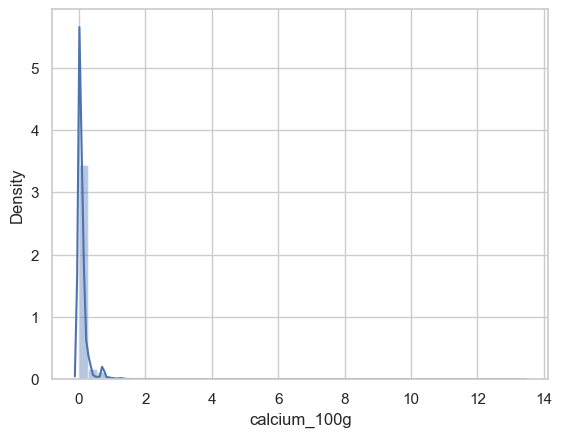

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='calcium_100g', ylabel='Density'>

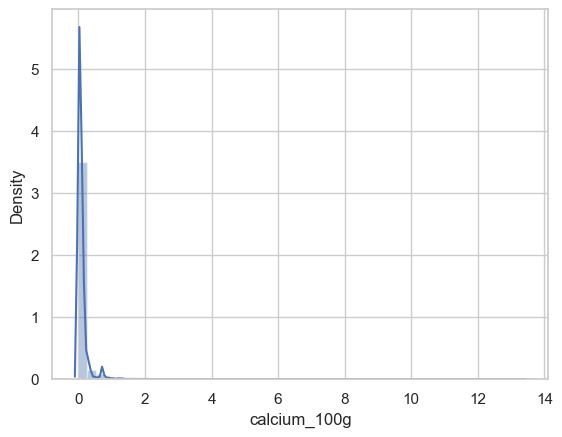

In [306]:
sns.distplot(data['calcium_100g'].head(10000).dropna())
# plt.show()
save_figure_opt('calcium_100g', library='matplotlib')
sns.distplot(data_test['calcium_100g'])

In [310]:
dt = clean_nan(data.head(10000),0.80)
print('***************** : dt ' , dt)
    # on sélectionne les colonnes qui contiennent des valeurs manquantes
#imputable_columns = dt.select_dtypes(['int32', 'float64','category'])
#print('********************* shape imputable columns : ', imputable_columns.shape)
#print('*********************  imputable columns : ', imputable_columns)
index_to_fill = dt[dt[column].isna()].index
print('***************** index_to_fill ; ' , index_to_fill )
columns_to_calculate = dt[numeric_columns].iloc[index_to_fill[1],:].dropna().index.tolist() 
print(' ***************** columns_to_calculate :', columns_to_calculate)
dtree = dt[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1)
print('*********************** dtree : ' , dtree)
#on calcule le KDTree sur la base des données des autres colonnes, après suppression de TOUS les NaN
tree = KDTree(dtree, leaf_size=2)
print('...arbre calculé')
#on détermine les distances/indices aux 10 plus proches voisins de tous les points du jeu de donnée
dist, ind = tree.query(dt[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), k=10)
print(data['categories'].unique())
#data['categories'] = data['categories'].round()

Nombre de colonnes supprimées : 120
***************** : dt               code  \
0     3087          
1     4530          
2     4559          
3     16087         
4     16094         
...     ...         
9995  11822583220   
9996  11822583237   
9997  11822583244   
9998  11822583251   
9999  11822583268   

                                                                                                              url  \
0     http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao                    
1     http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole                          
2     http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser                                  
3     http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies                      
4     http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill          

### Fonction

In [198]:
# Définition d'une fonction pour imputer les valeurs manquantes des variables numériques par la méthode des K plus proches voisins
def impute_knn(dataframe):
    '''Imputation des NaN de variables numériques par la méthodes des K plus proches voisins'''

    # on sélectionne les colonnes numériques
    numeric_columns = dataframe.select_dtypes(['int32','float64']).columns
    print('*********************  numeric_columns : ', numeric_columns)
    print('********************* shape numeric_columns : ', numeric_columns.shape)

    # on sélectionne les colonnes qui contiennent des valeurs manquantes
    imputable_columns = dataframe.select_dtypes(['int32', 'float64','category'])
    print('********************* shape imputable columns : ', imputable_columns.shape)

    # pour chaque colonne contenant des valeurs manquantes
    for column in imputable_columns:
        print('\n...imputation colonne ', column)

        # on identifie les indices des données manquantes pour la colonne du tour de boucle
        index_to_fill = dataframe[dataframe[column].isna()].index
        print('*********************index_to_fill : ' , index_to_fill)

        # on stocke le nombre de NaN pour comparer leur nombre avant et après le traitement
        nb_nan = dataframe[column].isna().sum()

        # si la colonne contient des valeurs manquantes
        if nb_nan != 0 :

            # on détermine les colonnes pour lesquelles on va calculer les distances
            columns_to_calculate = dataframe[numeric_columns].iloc[index_to_fill[1],:].index.tolist() 
            print('********************columns_to_calculate ', columns_to_calculate)

            # on calcule le KDTree sur la base des données des autres colonnes, après suppression de TOUS les NaN
            dtree = dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1)
            tree = KDTree(dtree, leaf_size=2)
            print('...arbre calculé')

            # on détermine les distances/indices aux 10 plus proches voisins de tous les points du jeu de donnée
            dist, ind = tree.query(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), k=10)
            print('...dimensions {}/indice {}calculés : '.format(dist.shape, ind.shape))
            print('index to fill : ', index_to_fill)

            # pour chaque point où on a des données manquantes, on impute la moyenne des 10 plus proches voisins 
            for i, x in enumerate(index_to_fill):

                # pour les donnnées catégorielles, on attribue selon la valeur la plus fréquente
                if pd.api.types.is_categorical_dtype(dataframe[column]):
                    vote = dataframe.iloc[ind[i,:], dataframe.columns.get_loc(column)].value_counts().reset_index().iloc[0,0]
                    dataframe.iloc[x,dataframe.columns.get_loc(column)] = vote
                    
                # pour les données numériques, on attribue selon la moyenne des valeurs les plus proches
                elif pd.api.types.is_numeric_dtype(dataframe[column]):
                    mean = dataframe.iloc[ind[i,:], dataframe.columns.get_loc(column)].mean()
                    dataframe.iloc[x,dataframe.columns.get_loc(column)] = mean
                else:
                    print('Type inconnu {}, colonne {} non traitée'.format(dataframe[column].dtype, column))

        print('Colonne {} traitée, {} NaN initialement, {} NaN après imputation'.format(column, nb_nan, dataframe[column].isna().sum()))
    try:
        dataframe['nova_group'] = dataframe['nova_group'].round()
    except:
        print('colonne nova_group absente')
    return dataframe

### Observation de l'application de la fonction d'imputation sur une partie du jeu de données

In [402]:
data_test = impute_knn(clean_nan(data.head(10000),0.80))

Nombre de colonnes supprimées : 120
*********************  numeric_columns :  Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')
********************* shape numeric_columns :  (20,)
********************* shape imputable columns :  (10000, 20)

...imputation colonne  additives_n
*********************index_to_fill :  Int64Index([   0,   46,   48,  136,  138,  183,  186,  187,  190,  191,
            ...
            9743, 9761, 9832, 9836, 9859, 9860, 9881, 9883, 9893, 9894],
           dtype='int64', length=242)
********************columns_to_calculate  ['additives_n', 'ingredients_f

...dimensions (7254, 10)/indice (7254, 10)calculés : 
index to fill :  Int64Index([   0,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            9954, 9960, 9967, 9968, 9971, 9984, 9985, 9989, 9990, 9991],
           dtype='int64', length=2050)
Colonne cholesterol_100g traitée, 2050 NaN initialement, 0 NaN après imputation

...imputation colonne  carbohydrates_100g
*********************index_to_fill :  Int64Index([   0,    9,   25,   46,   47,   48,   71,   96,   98,  136,
            ...
            9743, 9761, 9832, 9859, 9860, 9881, 9883, 9893, 9894, 9954],
           dtype='int64', length=270)
********************columns_to_calculate  ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'i

...dimensions (7297, 10)/indice (7297, 10)calculés : 
index to fill :  Int64Index([   0,    3,    4,    5,    7,    8,    9,   10,   12,   13,
            ...
            9954, 9960, 9967, 9968, 9971, 9984, 9985, 9989, 9990, 9991],
           dtype='int64', length=2298)
Colonne vitamin-c_100g traitée, 2298 NaN initialement, 0 NaN après imputation

...imputation colonne  calcium_100g
*********************index_to_fill :  Int64Index([   0,    4,    9,   11,   14,   15,   17,   18,   25,   30,
            ...
            9967, 9968, 9971, 9975, 9976, 9984, 9985, 9989, 9990, 9991],
           dtype='int64', length=2280)
********************columns_to_calculate  ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100

In [403]:
data_test.head()

code  \
0  3087    
1  4530    
2  4559    
3  16087   
4  16094   

                                                                                          url  \
0  http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
1  http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole         
2  http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser                 
3  http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies     
4  http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill       

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1  usda-ndb-import             1489069957  2017-03-09T14:32:37Z   
2  usda-ndb-import             1489069957  2017-03-09T14:32:37Z   
3  usda-ndb-import             1489055731  2017-03-09T10:35:31Z   
4  usda-ndb-import             1489055653  2017-03-09T10:34:13Z   

   last_modified_t last_modified_datetime                    product_name  \
0  1474103893       2016-09-17T09:18:13Z   Farine de blé noir               
1  1489069957       2017-03-09T14:32:37Z   Banana Chips Sweetened (Whole)   
2  1489069957       2017-03-09T14:32:37Z   Peanuts                          
3  1489055731       2017-03-09T10:35:31Z   Organic Salted Nut Mix           
4  1489055653       2017-03-09T10:34:13Z   Organic Polenta                  

            brands      brands_tags countries    countries_tags countries_fr  \
0  Ferme t'y R'nao  ferme-t-y-r-nao  en:FR     en:france         France        
1  NaN              NaN              US        en:united-states  États-Unis    
2  Torn & Glasser   torn-glasser     US        en:united-states  États-Unis    
3  Grizzlies        grizzlies        US        en:united-states  États-Unis    
4  Bob's Red Mill   bob-s-red-mill   US        en:united-states  États-Unis    

                                                                                                                                                         ingredients_text  \
0  NaN                                                                                                                                                                      
1  Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.                                                                             
2  Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.   
3  Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.                                                                            
4  Organic polenta                                                                                                                                                          

      serving_size  additives_n  \
0  NaN              4.888889      
1  28 g (1 ONZ)     0.000000      
2  28 g (0.25 cup)  0.000000      
3  28 g (0.25 cup)  0.000000      
4  35 g (0.25 cup)  0.000000      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                additives  \
0  NaN                                                                            

In [404]:
# Accéder aux lignes correspondant à l'indice de la troisième valeur renvoyée par ind, pour la colonne de "calcium_100g"
data_test.iloc[ind[2,:], data_test.columns.get_loc("calcium_100g")].sum()

0.7378168549516403

In [214]:
# sélectionne les colonnes de types int32, float64 et category et calcule la somme des valeurs manquantes
data_test.select_dtypes(['int32','float64', 'category']).isna().sum().sum()

0

Regardons un exemple d'application du traitement sur plusieurs variables numériques du jeu de données :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


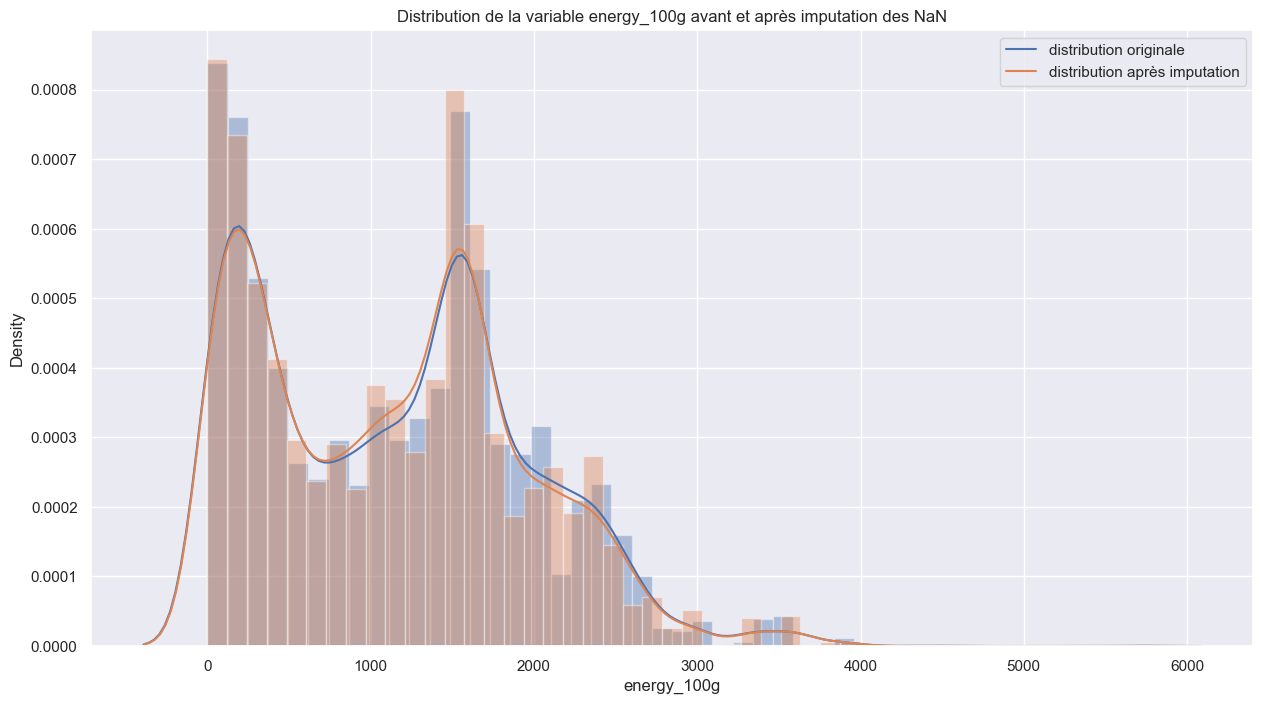


Traitement de la variable  energy_100g
Moyenne (Avant / Après) :  1145.06871  /  1137.8771956174337
Ecart-Type (Avant / Après) :  822.9954958142553  /  813.4992043995865


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


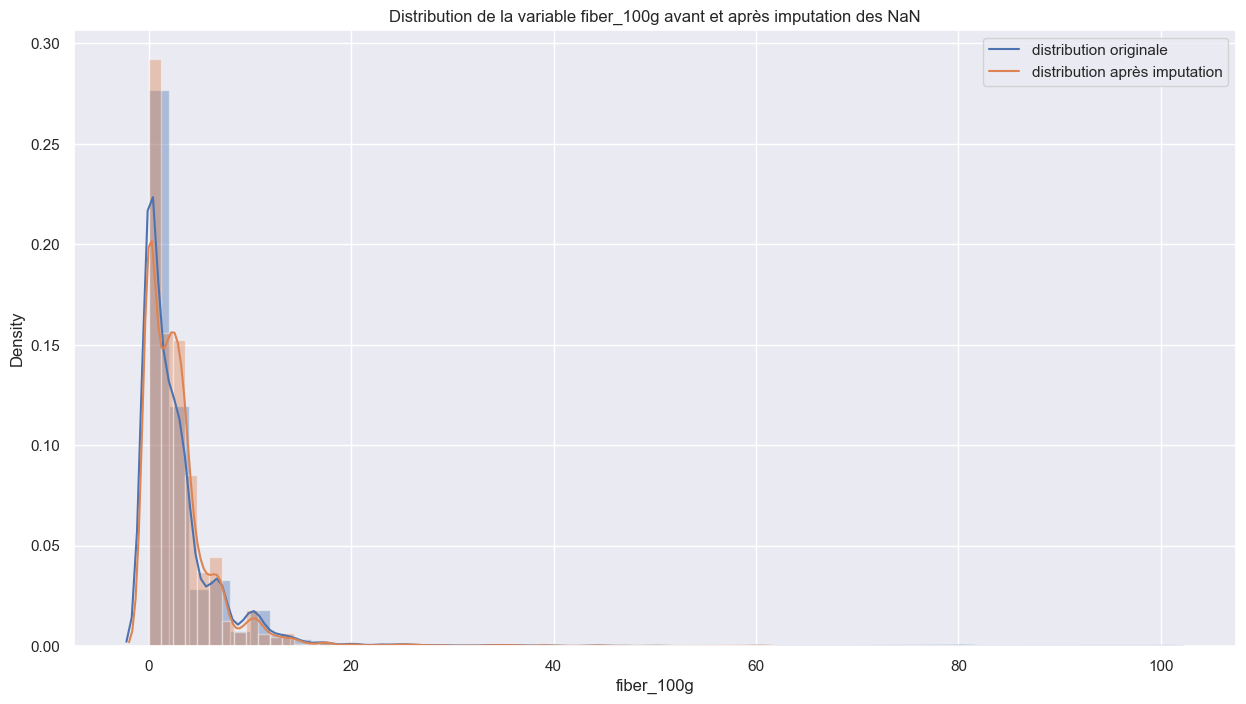


Traitement de la variable  fiber_100g
Moyenne (Avant / Après) :  2.8758157999999576  /  2.952639044638694
Ecart-Type (Avant / Après) :  4.63465234803092  /  4.086200194567312


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


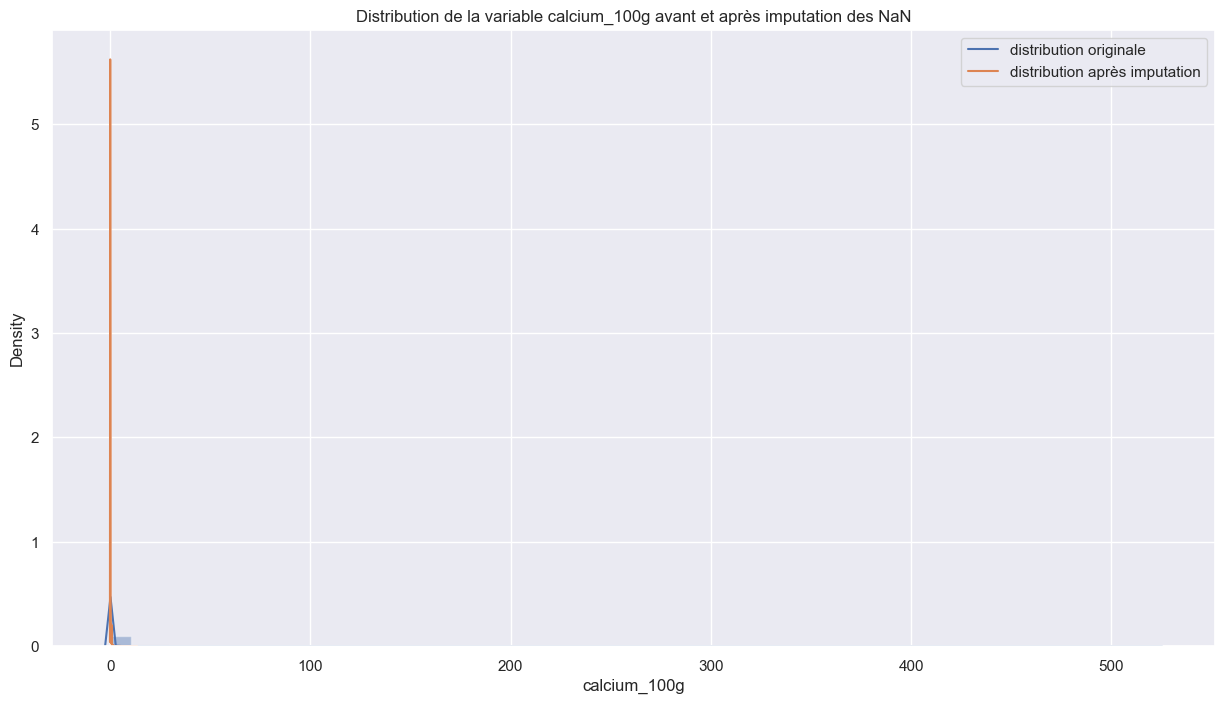


Traitement de la variable  calcium_100g
Moyenne (Avant / Après) :  0.14663910900000107  /  0.0943780663954145
Ecart-Type (Avant / Après) :  5.231848322529507  /  0.22453567882583111


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


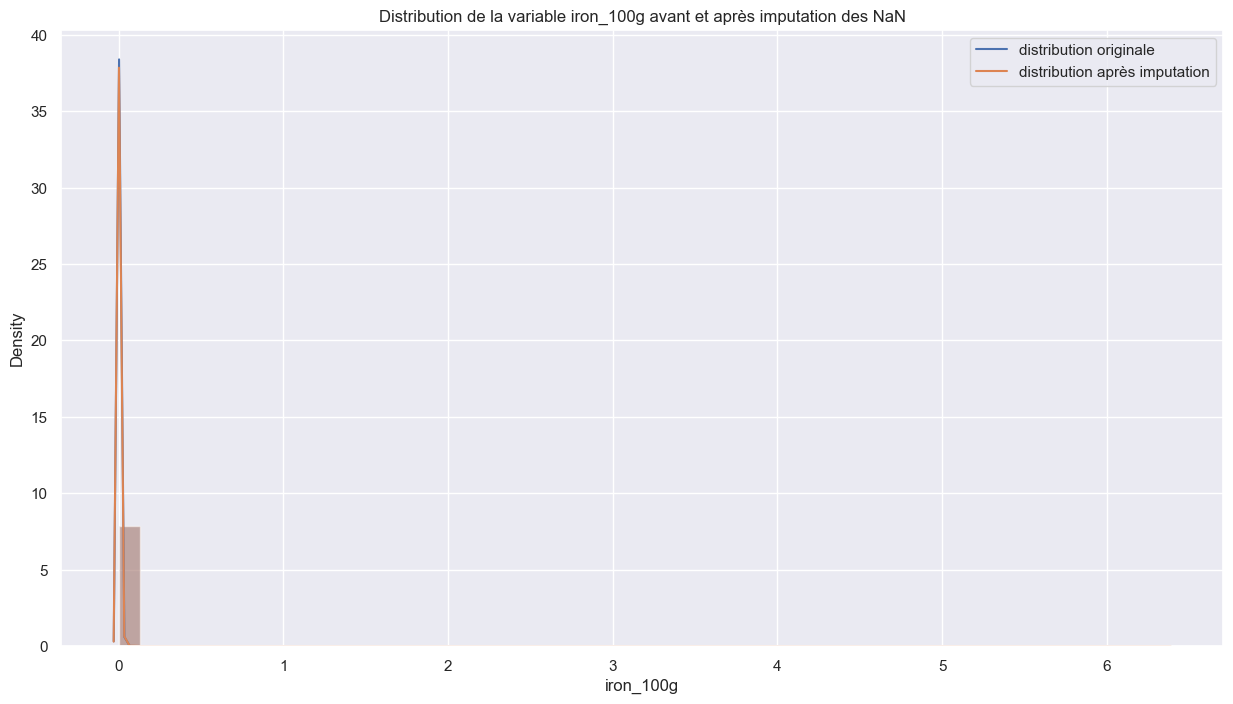


Traitement de la variable  iron_100g
Moyenne (Avant / Après) :  0.0024468195999999996  /  0.002798850418521021
Ecart-Type (Avant / Après) :  0.06363791508368202  /  0.06478444327406908


In [243]:
# sns.set(font_scale=1.5)
# for column in ['energy_100g', 'fiber_100g', 'calcium_100g', 'iron_100g']:
#     plt.figure(figsize=(15,8))
#     chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
#     plt.title(chaine)
    
#     sns.distplot(data[column].dropna().head(10000))
#     sns.distplot(data_test[column].dropna())
#     plt.legend(['distribution originale', 'distribution après imputation'])
#     print('\nTraitement de la variable ',column)
#     print('Moyenne (Avant / Après) : ', data[column].dropna().head(10000).mean(), ' / ', data_test[column].mean())
#     print('Ecart-Type (Avant / Après) : ', data[column].dropna().head(10000).std(), ' / ', data_test[column].std())
# sns.set(font_scale=1)

# Importation de la bibliothèque seaborn pour la visualisation des distributions
import importlib
import sys

# Vérifier si seaborn est déjà chargé
if importlib.util.find_spec('seaborn') is None:
    # Si seaborn n'est pas chargé, le charger
    !pip install seaborn
    
# Vérifier si seaborn est déjà importé
if 'seaborn' not in sys.modules:
    import seaborn as sns

# Pour chaque variable numérique à imputer, on crée un graphique montrant la distribution avant et après l'imputation
for column in ['energy_100g', 'fiber_100g', 'calcium_100g', 'iron_100g']:
    
    # On crée une figure de taille 15x8
    plt.figure(figsize=(15,8))
    
    # On crée un titre pour le graphique
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    # On trace la distribution originale de la variable (avant imputation)
    sns.distplot(data[column].dropna().head(10000))
    
    # On trace la distribution de la variable après imputation
    sns.distplot(data_test[column].dropna())
    
    # On ajoute une légende
    plt.legend(['distribution originale', 'distribution après imputation'])
    save_figure_opt(chaine, library='matplotlib')  
    # On affiche les statistiques avant et après imputation pour chaque variable
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', data[column].dropna().head(10000).mean(), ' / ', data_test[column].mean())
    print('Ecart-Type (Avant / Après) : ', data[column].dropna().head(10000).std(), ' / ', data_test[column].std())

# On réduit la taille de la police utilisée dans les graphiques
sns.set(font_scale=1)


Les graphes sont difficiles à lire sans suppression des outliers mais pour ceux qui sont lisibles, l'allure des distributions est très proches.
Lorsqu'on regarde l'impact de l'imputation sur la moyenne et l'écart type, on constate de forte disparités selon les features : 

**Moyenne**
* pour energy, calcium, fiber et iron : la moyenne varie assez peu (de l'ordre de 1 à 10%)

**Ecart Type**
* pour energy et iron, l'écart type est assez stable après application du traitement
* pour calcium et fiber, on peut constater d'importantes variations d'écart type : 
    * pour fiber : de l'ordre de 11.82 % de diminution,
    * pour calcium : l'écart type est réduit d'un facteur 25 (!)  observons de plus près cette variable

Recalculons l'écart type en retirant sommairement les outliers au delà du dernier centile

In [388]:
# Charger le fichier CSV
#data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')
print('dernier centile : ',data['calcium_100g'].dropna().head(10000).quantile(0.99))
print('écart type avant imputation :', data['calcium_100g'].dropna().head(10000)[data[column] < 0.861].std())
print('écart type après imputation :', data_test['calcium_100g'][data_test['calcium_100g'] < 0.861].std())

C:\Users\Zbook\AppData\Local\Temp\ipykernel_7460\3726548594.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/fr.openfoodfacts.org.products.csv", sep='\t')


dernier centile :  0.8570400000000009
écart type avant imputation : 0.14011074706976312
écart type après imputation : 0.12314773567056657


L'observation sur l'écart type n'est en fait pas pertinente car l'écart type calculé était fortement impacté par les outliers. On constate tout de même un écart de 11.82 % entre l'écart type avant et après imputation, ce qui n'est pas négligeable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


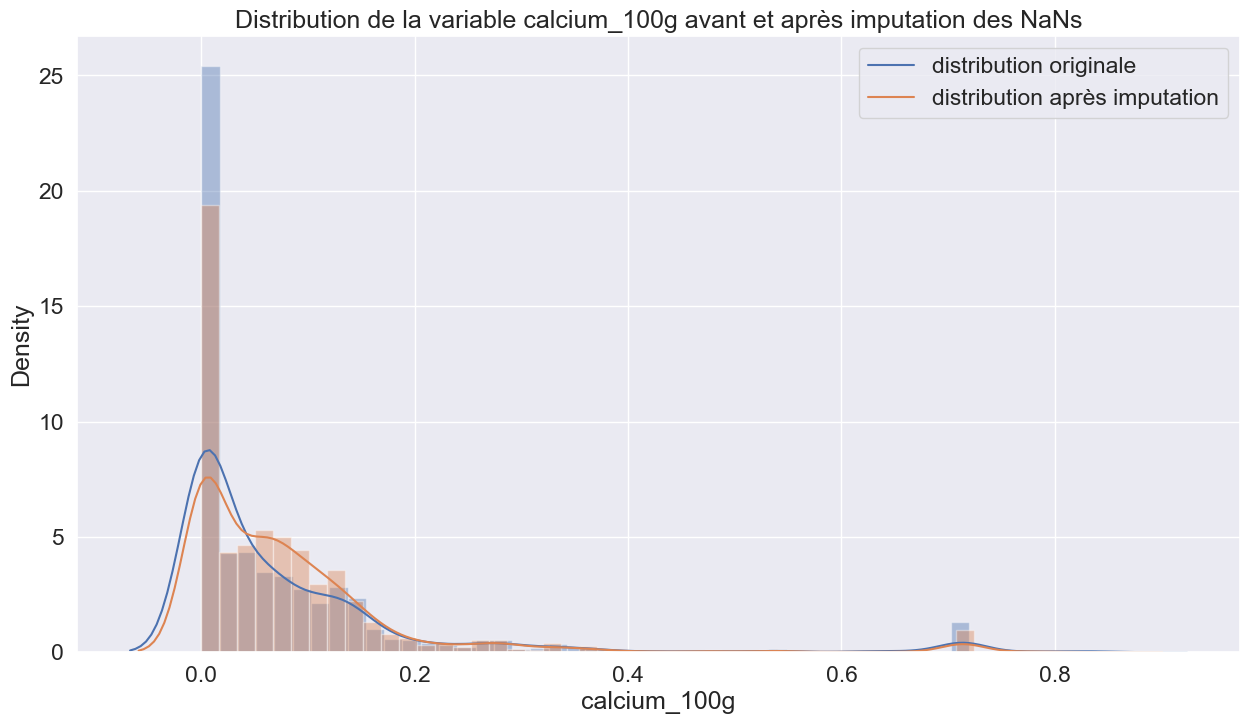

In [244]:
# sns.set(font_scale=1.5)
# for column in ['calcium_100g']:
#     plt.figure(figsize=(15,8))
#     chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
#     plt.title(chaine)
    
#     sns.distplot(data[column].dropna().head(10000)[data[column] < 0.861])
#     sns.distplot(data_test[column][data_test[column] < 0.861])
#     plt.legend(['distribution originale', 'distribution après imputation'])
# sns.set(font_scale=1) 
# Importer la bibliothèque seaborn et régler la taille de police
import seaborn as sns
sns.set(font_scale=1.5)

# Parcourir la liste des colonnes et afficher les distributions des valeurs avant et après imputation des NaN
for column in ['calcium_100g']:
    # Créer une figure avec une taille de 15x8 pouces
    plt.figure(figsize=(15,8))
    # Créer une chaîne de caractères contenant le nom de la variable pour le titre de la figure
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaNs'
    # Titre de la figure
    plt.title(chaine)
    
    # Tracer la distribution des valeurs avant imputation des NaN pour les valeurs inférieures à 0,861
    sns.distplot(data[column].dropna().head(10000)[data[column] < 0.861])
    # Tracer la distribution des valeurs après imputation des NaN pour les valeurs inférieures à 0,861
    sns.distplot(data_test[column][data_test[column] < 0.861])
    
    # Légende des deux distributions
    plt.legend(['distribution originale', 'distribution après imputation'])
    save_figure_opt(chaine, library='matplotlib')
# Réinitialiser la taille de police
sns.set(font_scale=1)


En observant la distribution de calcium_100g de plus près, on voit l'impact de l'imputation:
* la distribution semble avoir été lissée : le pic d'occurence de valeur autour de 0 est réduit de 25 % tandis que les autres valeurs voient leur part augmenter dans la distribution. De même le pic d'occurence de valeur autour de 0.7 a été réduit en proportion après application de l'imputation
* dans ce cas, le KNN semble avantager les valeurs intermédiaires au détriment des valeurs plus extrêmes.

Observons l'impact sur une donnée catégorielle :

In [448]:
# Sélectionner les colonnes de type 'category'
cat_columns = data.select_dtypes(include='category').columns.tolist()

# Afficher les noms des colonnes sélectionnées
print(cat_columns)

[]


In [450]:
data_test['nova_group'].value_counts()

4.500000    62941
0.114574    821  
1.840141    621  
1.070794    420  
0.260027    414  
           ...   
0.179263    1    
1.613013    1    
0.052235    1    
0.611073    1    
6.150694    1    
Name: nova_score, Length: 166963, dtype: int64

In [406]:
clean_nan(data.head(10000),0.80)['nova_group'].value_counts()

Nombre de colonnes supprimées : 120


4    6083
3    1544
2    1241
1    1132
Name: nova_group, dtype: int64

Note : la fonction n'a pas pu être appliquée à tout le jeu de données (problème de performance)

Nombre de colonnes supprimées : 120
Nombre de colonnes supprimées : 120


Text(0.5, 1.0, 'Nova Group column\nAfter imputation')

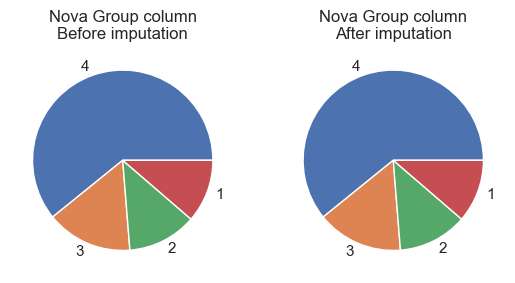

In [407]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(clean_nan(data.head(10000),0.80)['nova_group'].value_counts(), 
              labels = clean_nan(data.head(10000),0.80)['nova_group'].value_counts().index)
ax1.set_title('Nova Group column\nBefore imputation')

ax2.pie(data_test['nova_group'].round().value_counts(), 
              labels = data_test['nova_group'].round().value_counts().index)
ax2.set_title('Nova Group column\nAfter imputation')

On observe que le vote de la catégorie la plus présente "localement retient la catégorie majoritaire à l'échelle du jeu de donnée

### Fonction optimisée (tentative)

L'application de la fonction étant très lourde en ressource : la fonction ci-après propose de procéder avec la fonction KNeighbors Regressor

In [408]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

def impute_knn_optimised(dataframe):
    
    #boucle sur les colonnes des features où on a des NaN
        #si catégoriel : KNeighborsClassifier
        #si numérique : KNeighborsRegressor
        #boucle sur toutes les observations:
            #si la valeur de la feature pour l'observation est un NaN:
                #pour cette observation, on sauvegarde toutes les features pour lesquellse on a pas de NaN
                #on cherche les autres observations pour lesquelles ont a la feature en question + les autres features qui ne sont pas des NaN
                #on checke dans notre dictionnaire si cette combinaison de features est présente
                    #si oui on extrait le modèle
                    #sinon on fit le knn et on enregistre dans le dictionnaire les features et le modèle
                #on prédit la valeur
    
    '''Fonction d`'imputation des NaN par la méthodes des K plus proches voisins (ici K=5)'''
    
    #on sélectionne les colonnes qui ont des NaN et de type numérique ou catégoriel
    
    imputable_columns = dataframe[
        dataframe.columns[
            dataframe.isna().any()].tolist()].select_dtypes(['int32', 'float64','category']).columns
    #print('      Shape imputable columns : ', imputable_columns.shape)
    #print(imputable_columns)
    print('NaN avant imputation : ', 100*dataframe.isna().sum().sum()/(dataframe.shape[0]*dataframe.shape[1]),'%')
    #on boucle sur les colonnes imputables
    for column in imputable_columns:
        #print('... Imputation colonne ', column)
        dict_models = {}
        list_index_nan = []
        

        #list_index_nan = dataframe[imputable_columns].isna().index.tolist()
        list_index_nan = dataframe[dataframe[column].isna()].index.tolist()
        #print('      Nombre de NaN avant imputation : {} '.format(len(list_index_nan)))
        for indice in list_index_nan:
            #on stocke la liste des features pour lesquelles l'observation en question n'a pas de NaN
            non_nan_features = dataframe.select_dtypes(['int32', 'float64']).columns[
                ~dataframe.select_dtypes(['int32', 'float64']).iloc[indice,:].isna()].tolist()
            
            #on cherche les autres observations pourquelles l'observation en question n'est pas un NaN ainsi que les features stockées juste avant
            non_nan_features_prediction = non_nan_features.copy()
            non_nan_features_prediction.append(column)
            
            #indice des valeurs pour lesqueslles on a aucun NaN dans les features et dans la feature considérée
            index_fit = dataframe[non_nan_features_prediction][~data[non_nan_features_prediction].isna().any(axis=1)].index
           
            
            if non_nan_features != []:
                if len(non_nan_features) > 4:
                    non_nan_features = non_nan_features[:4]
                #print('\nindice imputable : {}'.format(indice))
                #print(non_nan_features)
                #on détermine si le modèle est de type régression ou classifieur
                if pd.api.types.is_categorical_dtype(dataframe[column]):
                    model = KNeighborsClassifier(n_neighbors=5)
                elif pd.api.types.is_numeric_dtype(dataframe[column]):
                    model = KNeighborsRegressor(n_neighbors=5)
        
                #si la combinaison de features existe déjà dans le dictionnaire de modèles, on récupère le modèle
                if tuple((non_nan_features)) in dict_models:
                    #print('      Modèle Existant')

                    model = dict_models[tuple(non_nan_features)]
                    
                #sinon on créé un autre modèle à partir des données
                else:
                    #print('      Nouveau modèle')
                    X = dataframe.loc[index_fit, non_nan_features]
                    
                    if X.shape[0] > 2:
                        #print('      Nombre de colonnes pour entrainer le modèle : {}'.format(X.shape[1]))
                        #print('      Modèle entrainé sur {} valeurs'.format(X.shape[0]))
                        y = dataframe.loc[index_fit, column]
                        model.fit(X = X, y = y)
                        dict_models[tuple((non_nan_features))] = model
                        
                    #else:
                    #    print('      non imputé')
                    #    break

                #imputation de la valeur : prédiction
                X = dataframe.loc[indice, non_nan_features].values.reshape(1,-1)
                #print('      Shape X à imputer : {} '.format(X.shape))

                #print('      Nombre de features utilisées par le modèle:', len(non_nan_features))
                #print(id(model))
                valeur = model.predict(X)
                dataframe.loc[indice, column] = valeur
                #print('      colonne {}, indice {} : valeur à imputer {}'.format(column, indice, valeur))
                
                #print('      dictionnaire des modèles : {} modèles enregistrés'.format(len(dict_models)))
                #for key in list(dict_models.keys()):
                #    print('key : ', key)
                
        #print('      Nombre de NaN après imputation : ', dataframe[column].isna().sum())
        #print('      Fin imputation colonne {}. {} modèles fités\n'.format(column, len(dict_models)))
    print('NaN après imputation : ', 100*dataframe.isna().sum().sum()/(dataframe.shape[0]*dataframe.shape[1]),'%')
    return dataframe

En pratique, la fonction n'apporte pas de gain de performance.

## Suppression des colonnes contenant de l'information en doublon

In [69]:
#data[['countries_en', 'countries']]

On peut supprimer la colonne countries qui n'apporte pas d'information et présente des formats hétérogènes

In [409]:
columns_to_delete = ['countries']

In [410]:
# data_echantillon[['last_modified_datetime', 'last_modified_t']]

In [411]:
#data_echantillon[['created_datetime', 'created_t']]

En observant un échantillon de dates traitées, on voit que :
* last_modified_datetime et last_modified_t ont exactement les mêmes dates et aucune donnée manquante.
* created_datetime et created_t  ont exactement les mêmes dates et aucune donnée manquante.
Dans les deux cas, on peut conserver l'un des deux et supprimer l'autre

In [412]:
#data.dtypes

In [413]:
def remove_columns(dataframe) :
    colonnes = dataframe.columns.tolist()
    columns_to_delete = ['countries', 'countries_tags', 'last_modified_datetime', 'created_datetime', 
                         'main_category','brands_tags','labels',
                         'labels_en', 'categories_tags', 'categories_en', 
                        'serving_size', 'additives_en', 'traces', 'states','states_en', 'countries_en']
    for column in columns_to_delete:
        try:
            colonnes.remove(column)
        except:
            print('........colonne non présente : ', column)
    print('\n')
    return dataframe[colonnes]

## Nettoyage tirets dans titre des colonnes

In [414]:
def clean_column_names(dataframe):
    '''Fonction pour retirer les tirets dans les noms de colonnes pour avoir 
    la même mise en forme pour chaque colonne'''
    columns = dataframe.columns
    columns_treated = []
    for column in columns:
        if column[0] == '-':
            column = column[1:]
        columns_treated.append(column)
    dataframe.columns = columns_treated
    return dataframe

In [415]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

## Application des traitements de nettoyage au dataset entier

### Fonction de nettoyage

In [416]:
import datetime
def complete_cleaning(dataframe):
    '''Application de toutes les fonctions de nettoyage vues précédemment'''
    
    #controle des colonnes du dataset
    if control_columns(dataframe) is True :
               
        #Nettoyage types de données
        print('\n', datetime.datetime.now(),' - nettoyage des types\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try : 
            dataframe = nettoyage_types(dataframe)
        except Exception as e: 
            print(e)
            print('erreur dans le nettoyage')
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        #format des dates
        print('\n', datetime.datetime.now(),' - Mise en conformité du format des dates\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = clean_datetime(dataframe)
        except Exception as e: 
            print(e)
            print('Erreur dans la mise en conformité des dates')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        
        #traitement des tags
        print(datetime.datetime.now(),' - Traitement des tags\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = traitement_tags(dataframe)
        except Exception as e: 
            print(e)
            print('Erreur dans le traitement des tags')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
            
            
        #réduction du dataset à la France / suppression nutriscore UK
        print('\n', datetime.datetime.now(),' - Réduction du dataset à la France\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try :
            dataframe = tri_pays(dataframe)
        except Exception as e: 
            print(e)
            print('........erreur dans la réduction du dataset')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)   
            
            
        #nettoyage des colonnes avec trop de NaN
        print(datetime.datetime.now(),' - Nettoyage des colonnes contenant plus de 20 % de NaN\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = clean_nan(dataframe, taux_nan_max = 0.80)
        except Exception as e: 
            print(e)
            print('........Erreur dans le nettoyage des colonnes contenant trop de NaN')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
         
        #traitement des outliers
        print('\n', datetime.datetime.now(),' - Traitement des outliers\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = delete_outliers(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des outliers\n')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        

        #imputation des NaN
        print('\n', datetime.datetime.now(),' - Imputation des NaN par méthodes des kNN\n...')
        try:
            #dataframe = impute_knn(dataframe)
            print('........Traitement non appliqué par défaut (besoin en mémoire trop important.')
            print('........Un exemple de son application est visible dans le paragraphe dédié à l\'imputation ')
            print('........présenté dans ce notebook\n...')
        except Exception as e: 
            print(e)
            print('.........Erreur dans l\'imputation des NaN\n...')
        print_control_shape_nan(dataframe)
        
        #suppression des colonnes en doublon
        print(datetime.datetime.now(),' - Suppression des colonnes en doublon\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = remove_columns(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des colonnes inutiles')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
                
        #nettoyage des tirets dans les titres de colonnes:
        print('\n', datetime.datetime.now(),' - Nettoyage des titres de colonnes\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try :
            dataframe = clean_column_names(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des titres')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        
        print('\n', datetime.datetime.now(),' - Nettoyage des données effectué avec succès')

    else:
        print('\n', datetime.datetime.now(),' - Jeu de données non nettoyé')
        
    return dataframe
    

### Application

In [417]:
data_to_clean_cleaned = complete_cleaning(data.copy())

il manque la colonne URL dans le jeu de données
il manque la colonne créateur dans le jeu de données
il manque la colonne dernière_modification_t dans le jeu de données
il manque la colonne nom_produit dans le jeu de données
il manque la colonne nom générique dans le jeu de données
il manque la colonne quantité dans le jeu de données
il manque la colonne emballage dans le jeu de données
il manque la colonne marques dans le jeu de données
il manque la colonne catégories dans le jeu de données
il manque la colonne origines dans le jeu de données
il manque la colonne lieux_de_fabrication dans le jeu de données
il manque la colonne fabrication_places_tags dans le jeu de données
il manque la colonne Étiquettes dans le jeu de données
il manque la colonne villes dans le jeu de données
il manque la colonne lieux_d'achat dans le jeu de données
il manque la colonne magasins dans le jeu de données
il manque la colonne des pays dans le jeu de données
il manque la colonne pays_tags dans le jeu de d

In [134]:
data_to_clean_cleaned['nutrition_grade_fr'].value_counts()

d    39483
e    27378
c    23539
a    22011
b    12923
Name: nutrition_grade_fr, dtype: int64

In [135]:
data_to_clean_cleaned.head(5)

code  \
0  0000000000017          
1  0000000000031          
2  00000000001111111111   
3  0000000000123          
4  0000000000178          

                                                                            url  \
0  http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers       
1  http://world-en.openfoodfacts.org/product/0000000000031/cacao                  
2  http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt    
3  http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0   
4  http://world-en.openfoodfacts.org/product/0000000000178/mini-coco              

                      creator           product_name quantity packaging  \
0  kiliweb                     Vitória crackers       NaN      NaN        
1  isagoofy                    Cacao                  130 g    NaN        
2  openfoodfacts-contributors  Sfiudwx                dgesc    NaN        
3  kiliweb                     Sauce Sweety chili 0%  NaN      NaN        
4  kiliweb                     Mini coco              NaN      NaN        

  packaging_tags brands categories origins_tags manufacturing_places_tags  \
0  autre          NaN    NaN        autre        autre                      
1  autre          NaN    NaN        autre        autre                      
2  autre          Watt   fr:Xsf     autre        autre                      
3  autre          NaN    NaN        autre        autre                      
4  autre          NaN    NaN        autre        autre                      

  labels_tags stores ingredients_text traces_tags  additives_n additives_tags  \
0  autre       NaN    NaN              autre      NaN           autre           
1  autre       NaN    NaN              autre      NaN           autre           
2  autre       NaN    NaN              autre      NaN           autre           
3  autre       NaN    NaN              autre      NaN           autre           
4  autre       NaN    NaN              autre      NaN           autre           

  ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
0 NaN                          autre                           
1 NaN                          autre                           
2 NaN                          autre                           
3 NaN                          autre                           
4 NaN                          autre                           

  ingredients_that_may_be_from_palm_oil_n  \
0 NaN                                       
1 NaN                                       
2 NaN                                       
3 NaN                                       
4 NaN                                       

   ingredients_that_may_be_from_palm_oil  \
0  1.0                                     
1  1.0                                     
2  1.0                                     
3  1.0                                     
4  1.0                                     

  ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr nova_group  \
0  autre                                      NaN               NaN          
1  autre                                      NaN               NaN          
2  autre                                      NaN               NaN          
3  autre                                      NaN               NaN          
4  autre                                      NaN               NaN          

  pnns_groups_1 pnns_groups_2 main_category_en  \
0  unknown       unknown       NaN               
1  unknown       unknown       NaN               
2  unknown       unknown       fr:xsf            
3  unknown       unknown       NaN               
4  unknown       unknown       NaN               

                                                                              image_url  \
0  https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg   
1  https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400

### Taille du jeu final comparée à la taille du jeu initial 

In [136]:
taille_jeux = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           data_to_clean_cleaned.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             data_to_clean_cleaned.isna().sum().sum()/
                             data_to_clean_cleaned.shape[0] / 
                             data_to_clean_cleaned.shape[1]*100]
                           })

In [137]:
taille_jeux

Nom      Dimensions  Proportion de NaN (en %)
0  données initiales  (1007980, 175)  79.201944               
1  données nettoyées  (452606, 45)    30.684024

## Export du fichier nettoyé

In [138]:
data_to_clean_cleaned.to_csv('data/en.openfoodfacts.org.products_cleaned2.csv', index=False)

In [139]:
res = data_to_clean_cleaned.dtypes.to_frame('dtypes').reset_index()
types = res.to_csv('dtypes.csv', index=False)

# Complément : Réduction de dimension par ACP / PCA

## Application

Fonction utilisée pour la réduction de dimension (projection sur un hyperplan de dimension n en maximisant la variance)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [141]:
data_to_clean_cleaned.select_dtypes(['float64','int32']).shape

(452606, 12)

In [142]:
data_pca = data_to_clean_cleaned.select_dtypes(['float64','int32']).drop('nutrition-score-fr_100g', axis=1).dropna()

In [143]:
colonnes_pca = data_pca.columns

In [144]:
#on ramène nos données à une moyenne nulle et une variance de 1
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

In [145]:
pca = PCA(n_components = data_pca.shape[1])

In [146]:
pca.fit(data_pca)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [147]:
pca.explained_variance_ratio_

array([2.81510552e-01, 2.09157053e-01, 1.47038109e-01, 1.35595597e-01,
       8.88549949e-02, 6.27363671e-02, 4.37115556e-02, 2.58621101e-02,
       5.33467760e-03, 1.98984320e-04, 1.03156707e-34])

In [148]:
pca.singular_values_

array([3.38838108e+02, 2.92066110e+02, 2.44883691e+02, 2.35162302e+02,
       1.90364443e+02, 1.59957494e+02, 1.33518991e+02, 1.02701524e+02,
       4.66443449e+01, 9.00853846e+00, 6.48624940e-15])

## Interprétation

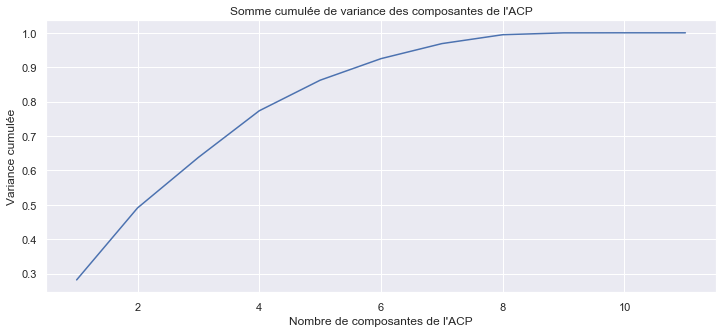

In [149]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(np.linspace(1, 11,11),
         np.cumsum(pca.explained_variance_ratio_))


On voit qu'à partir de 7 features on a une variance cumulée de plus de 95 %. On pourrait donc réduire notre jeu de données à 7 dimensions si on souhaitait gagner en temps de calcul / volume de données.


In [150]:
pca.components_

array([[ 6.98023328e-02, -1.66533454e-16,  5.51625342e-01,
         4.63681371e-01,  4.27960874e-01,  3.13106339e-01,
         2.49309546e-01,  1.89821276e-01,  2.65185431e-01,
         1.14429735e-01,  1.14218079e-01],
       [ 5.98218880e-02,  1.38777878e-16, -1.18788771e-01,
         5.60551083e-02,  1.94669285e-02, -2.62174715e-01,
        -2.66182681e-01, -3.26096395e-02,  1.32805988e-01,
         6.40445944e-01,  6.40569126e-01],
       [-3.59970606e-01,  3.33066907e-16,  2.26099859e-02,
         1.09896258e-01, -4.62252313e-02, -2.46101841e-01,
        -4.99749446e-01,  4.58799833e-01,  5.18650128e-01,
        -1.81548560e-01, -1.81453147e-01],
       [ 2.40426225e-01, -1.11022302e-16, -1.23404489e-01,
         4.21240620e-01,  4.73457031e-01, -5.15365452e-01,
        -1.80854320e-01, -3.81290137e-01, -9.04829072e-02,
        -1.91858420e-01, -1.91500729e-01],
       [ 8.89942257e-01,  1.66533454e-16, -1.15448948e-02,
        -1.42012910e-01, -1.71046713e-01,  2.63266686e-02,
  

In [151]:
pca.components_.shape

(11, 11)

Dans l'hypothèse où on ne retiendrait que les 2 composantes les plus explicatives, on obtient le plan factoriel ci-dessous

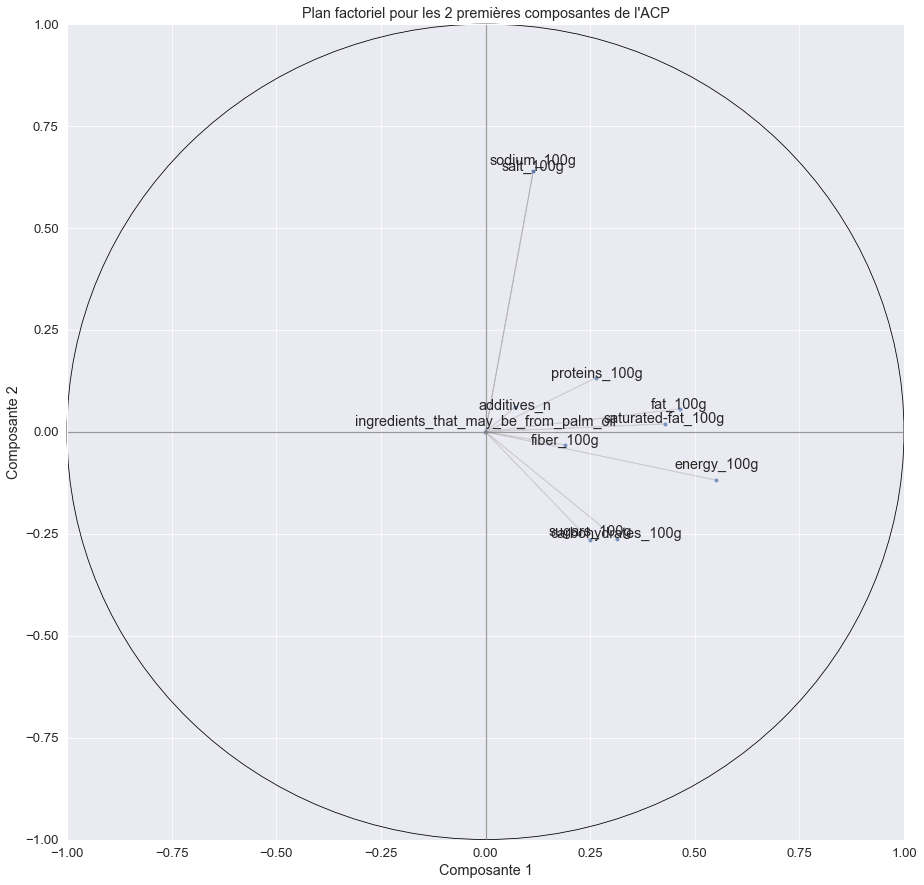

In [152]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

Observations : 
* fat_100g et saturated-fat_100g expliquent bien la variance sur la composante 1 mais pas sur al composante 2
* ingredients_that_may_be_from_palm_oil n'explique la variable sur aucune des 2 composantes
* additives_n n'explique pas la variable sur la composante 2 et quasiment pas sur la composante 1
* sodium_100g et salt_100g sont quasi confondus : les variables sont corrélées positivement
* carbohydrates_100g et sugars_100g sont très proches et donc également corrélées positivement : 
* carbohydrates_100g, sugars_100g, sodium_100g et salt_100g expliquent bien al variance sur la composante 2, moins sur la composante 1.

NB : ces résultats sont  cohérents avec ce qui est observé dans l'analyse multivariée (voir notebook suivant : partie analyse multivariée)


Regardons maintenant comment le jeu de donnée est réparti sur les deux premières composantes en fonction des nutri scores

Retraçons le même graphe que précédemment en ajoutant les points du jeu de donnée, après transformation, ainsi que l'information relative au nutriscore

In [153]:
nutriscore_index = data_to_clean_cleaned.select_dtypes(['float64','int32']).drop('nutrition-score-fr_100g', axis=1).dropna().index
nutriscore_grade = data_to_clean_cleaned['nutrition_grade_fr'].loc[nutriscore_index]
nutriscore_grade = nutriscore_grade.cat.add_categories("Unknown").fillna("Unknown")

unknown_index = nutriscore_grade[nutriscore_grade =='Unknown'].index

In [154]:
x_show = pca.transform(data_to_clean_cleaned.select_dtypes(['float64','int32'])
                       .drop('nutrition-score-fr_100g', axis=1).drop(unknown_index).dropna())[:,0]

y_show = pca.transform(data_to_clean_cleaned.select_dtypes(['float64','int32'])
                       .drop('nutrition-score-fr_100g', axis=1).drop(unknown_index).dropna())[:,1]

hue_show = nutriscore_grade[nutriscore_grade != 'Unknown']

In [155]:
x_show

array([ 381.40100314, 1353.54107821,  398.19569501, ...,  294.29122058,
         18.47256776,    8.46228637])

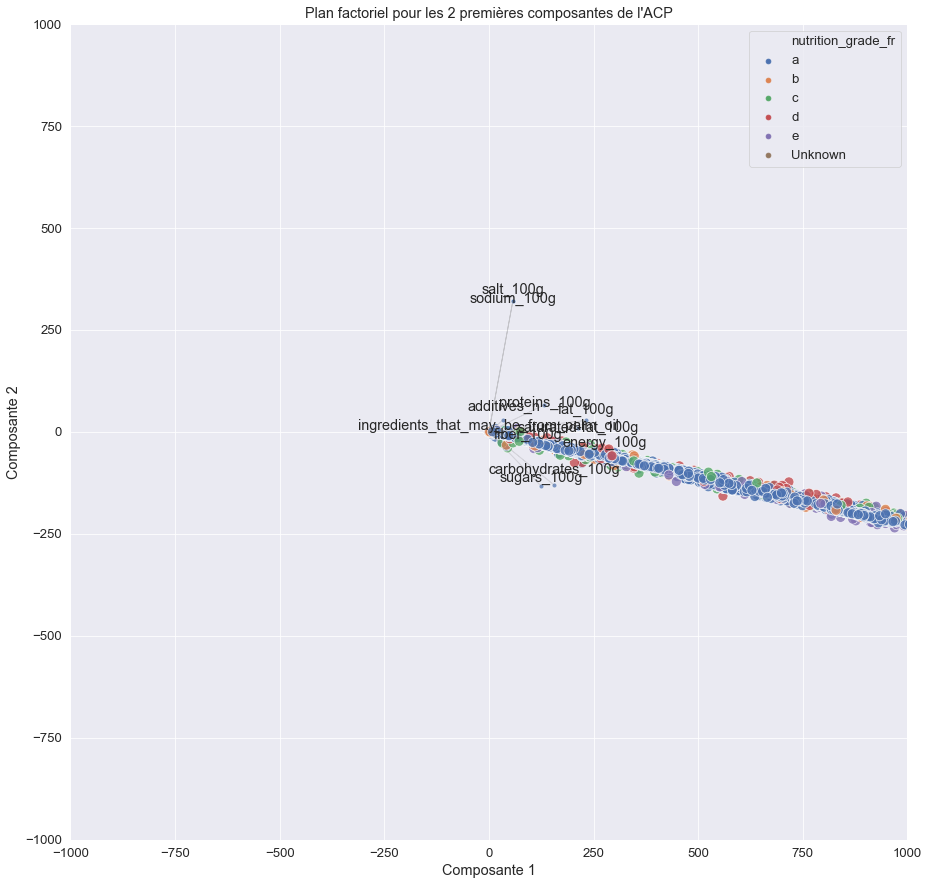

In [166]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
x_pca = pca.components_[0,:]*500
y_pca = pca.components_[1,:]*500

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
sns.scatterplot(x = x_show,
                y = y_show,
                hue = hue_show,
                alpha=0.8, s=100)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5+np.random.randint(-10,10)), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 


On observe que :
* on observe des alignements de points le long de certains vecteurs (en particulier energy_100g)
* On observe que les nutriscore d ont tendance à avoir des valeurs plus importantes en sucres
* Sur ces deux premières composantes, on observe uen première tendance de sépération des points avec :
    * des nutriscores d'indice a centrés autour de l'origine
    * des nutriscores d'indices d fortement alignés avec les composantes saturated_fat_100g, fat_100g et sugars_100g 
    * des nutriscores d'indices c en position intermédiaire entre a et d

In [157]:
pca_analysis = pd.DataFrame(pca.components_)
pca_analysis.columns = colonnes_pca

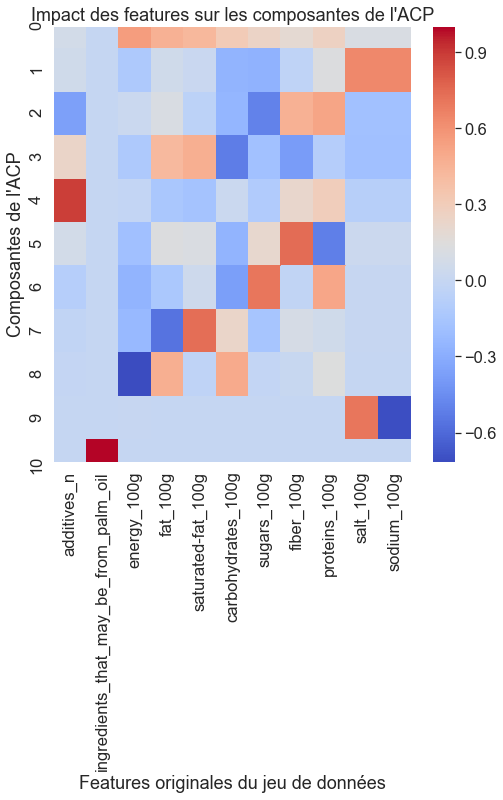

In [158]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8,8))
sns.set
sns.heatmap(pca_analysis, cmap='coolwarm')
plt.title('Impact des features sur les composantes de l\'ACP')
plt.xlabel('Features originales du jeu de données')
plt.ylabel('Composantes de l\'ACP')
sns.set(font_scale=1)

In [159]:
norms = np.linalg.norm(pca.components_[0:6], axis=0)

In [160]:
norms

array([9.96315447e-01, 4.55436774e-16, 6.07719978e-01, 6.67654613e-01,
       6.73549130e-01, 7.49962641e-01, 6.88063836e-01, 9.95092223e-01,
       8.44144484e-01, 7.07090288e-01, 7.07078442e-01])

In [161]:
normes = pd.DataFrame(norms).T

In [162]:
normes.columns = colonnes_pca

In [163]:
normes = normes.T.reset_index()

In [164]:
normes.columns = ['feature', 'norme']
normes.sort_values(by='norme', inplace=True, ascending=False)

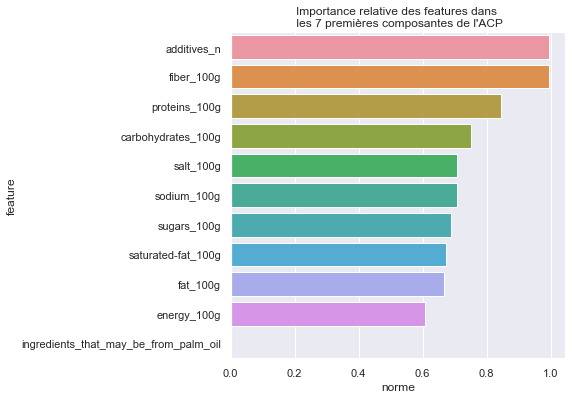

In [165]:
plt.figure(figsize=(6,6))
plt.title('Importance relative des features dans \n les 7 premières composantes de l\'ACP')
sns.barplot(y = normes['feature'],
            x = normes['norme'])

# Parties suivantes : voir notebook analysis